In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

Function to read csv files and svg files

In [ ]:
!pip install svgpathtools
#to install svg files

Function to regularize shapes

In [ ]:
import numpy as np
import os
import cv2
import math
from svgpathtools import svg2paths

In [ ]:
# Function to read CSV files
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

In [ ]:
# Read and process the CSV file
csv_path = "/content/drive/MyDrive/Curvetopia/frag0.csv"
output_data = read_csv(csv_path)

df = pd.read_csv("/content/drive/MyDrive/Curvetopia/frag0.csv")

In [ ]:
df

0.000000000000000000e+00  0.000000000000000000e+00.1  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
...                        ...                         ...   
1769                       9.0                         0.0   
1770                       9.0                         0.0   
1771                       9.0                         0.0   
1772                       9.0                         0.0   
1773                       9.0                         0.0   

      4.194200134277343750e+01  6.898000335693359375e+01  
0                    41.259605                 69.811707  
1                    40.588753                 70.652374  
2                    39.929607                 71.501953  
3                    39.282337                 72.360405  
4                    38.647114                 73.227669  
...                        ...                       ...  
1769                212.755249                  2.102682  
1770                213.760941                  2.103762  
1771                214.766632                  2.104841  
1772                215.772308                  2.105921  
1773                216.778000                  2.107000  

[1774 rows x 4 columns]

In [ ]:
len(output_data)

10

In [ ]:
for i in range(len(output_data)):
  print(output_data[i][0].shape)


(94, 2)
(166, 2)
(171, 2)
(166, 2)
(109, 2)
(205, 2)
(226, 2)
(208, 2)
(215, 2)
(215, 2)


In [ ]:
def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']  # Define some colors for plotting
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

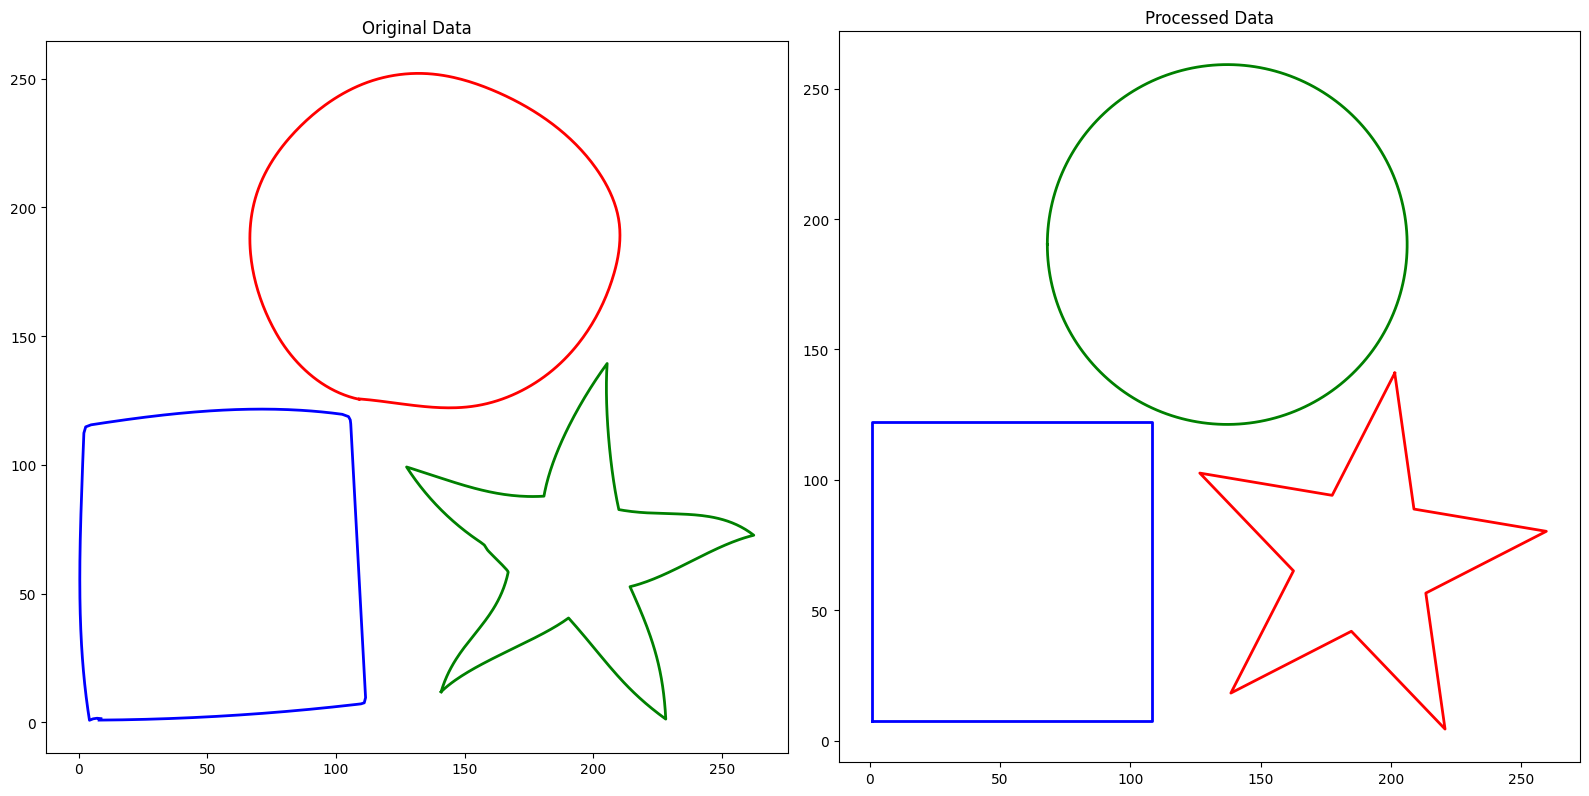

In [ ]:
# Read and process the CSV files
csv_path1 = "/content/drive/MyDrive/Curvetopia/isolated.csv"
csv_path2 = "/content/drive/MyDrive/Curvetopia/isolated_sol.csv"

output_data1 = read_csv(csv_path1)
output_data2 = read_csv(csv_path2)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plot(output_data2, 'Processed Data', axs[1])
plt.show()

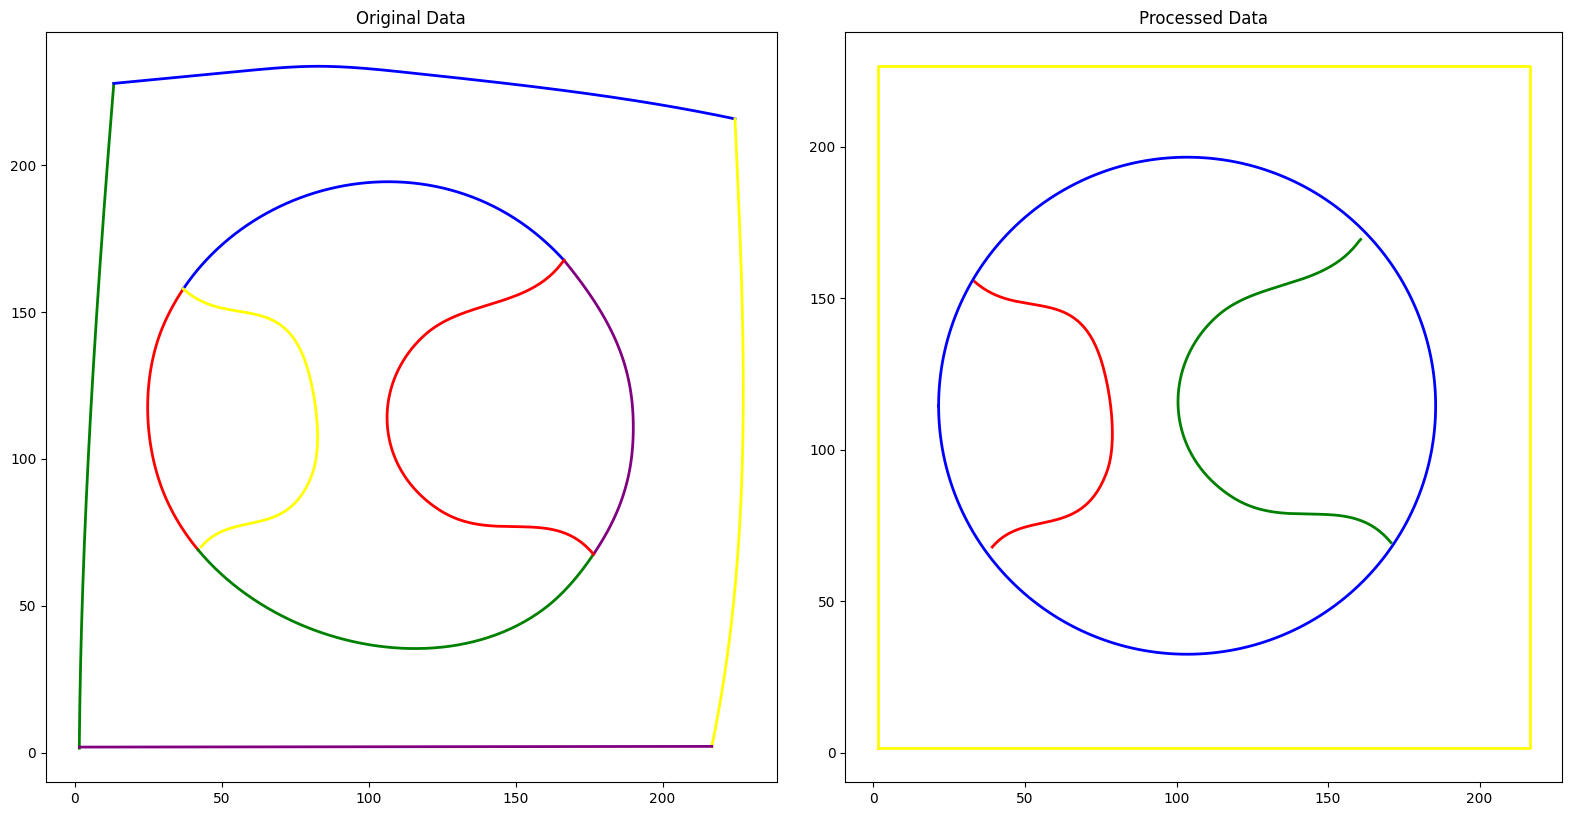

In [ ]:
# Read and process the CSV files
csv_path1 = "/content/drive/MyDrive/Curvetopia/frag0.csv"
csv_path2 = "/content/drive/MyDrive/Curvetopia/frag01_sol.csv"

output_data1 = read_csv(csv_path1)
output_data2 = read_csv(csv_path2)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plot(output_data2, 'Processed Data', axs[1])
plt.show()

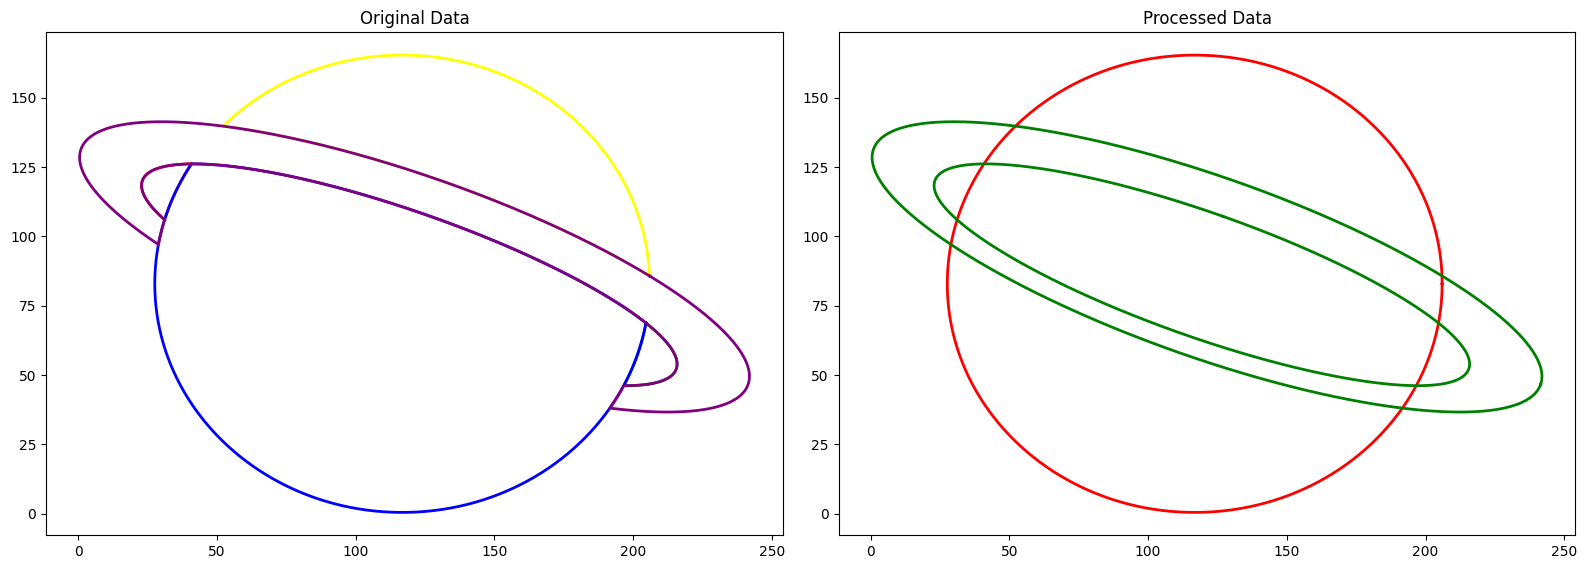

In [ ]:
# Read and process the CSV files
csv_path1 = "/content/drive/MyDrive/Curvetopia/occlusion2.csv"
csv_path2 = "/content/drive/MyDrive/Curvetopia/occlusion2_sol.csv"

output_data1 = read_csv(csv_path1)
output_data2 = read_csv(csv_path2)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plot(output_data2, 'Processed Data', axs[1])
plt.show()

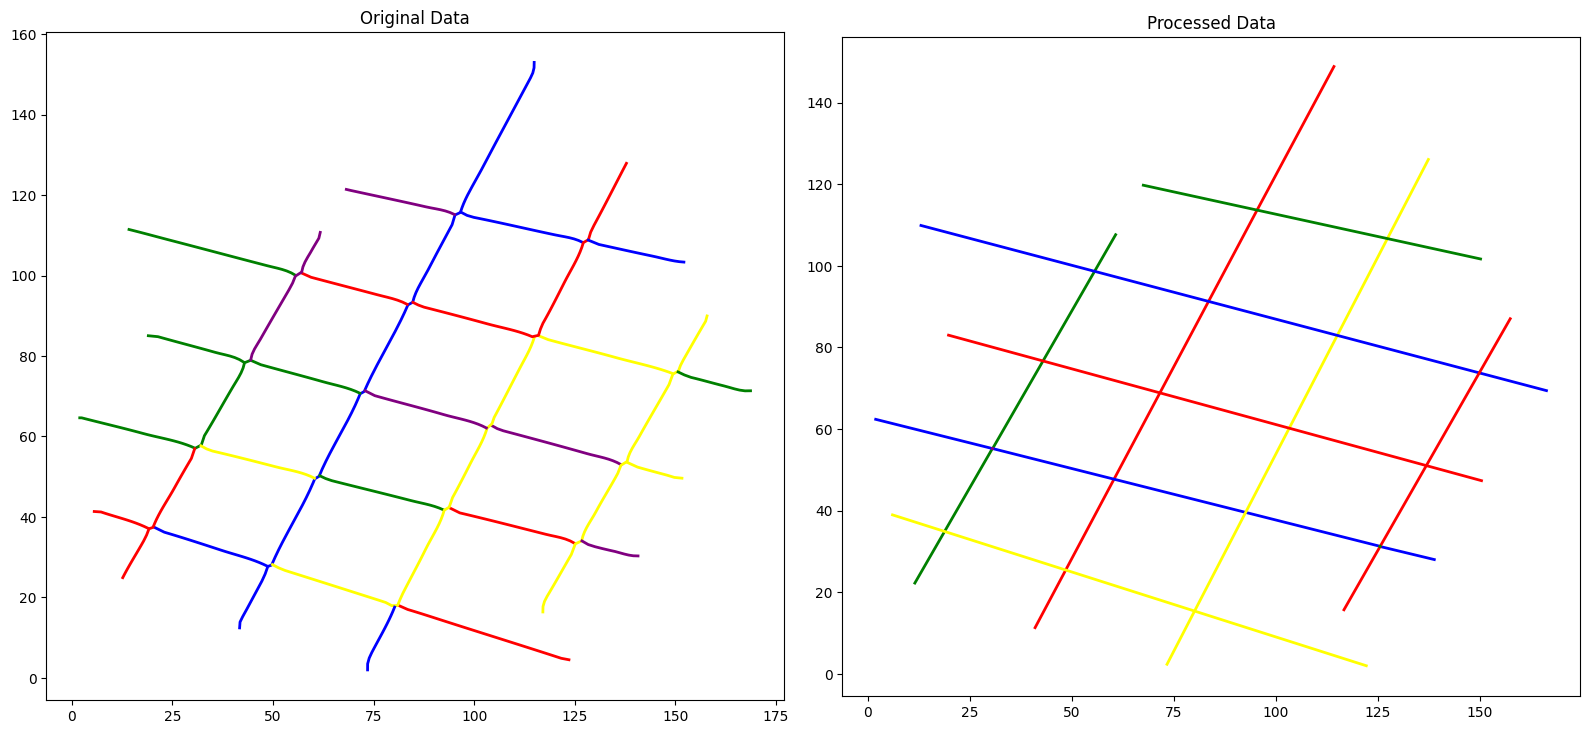

In [ ]:
# Read and process the CSV files
csv_path1 = "/content/drive/MyDrive/Curvetopia/frag2.csv"
csv_path2 = "/content/drive/MyDrive/Curvetopia/frag2_sol.csv"

output_data1 = read_csv(csv_path1)
output_data2 = read_csv(csv_path2)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plot(output_data2, 'Processed Data', axs[1])
plt.show()

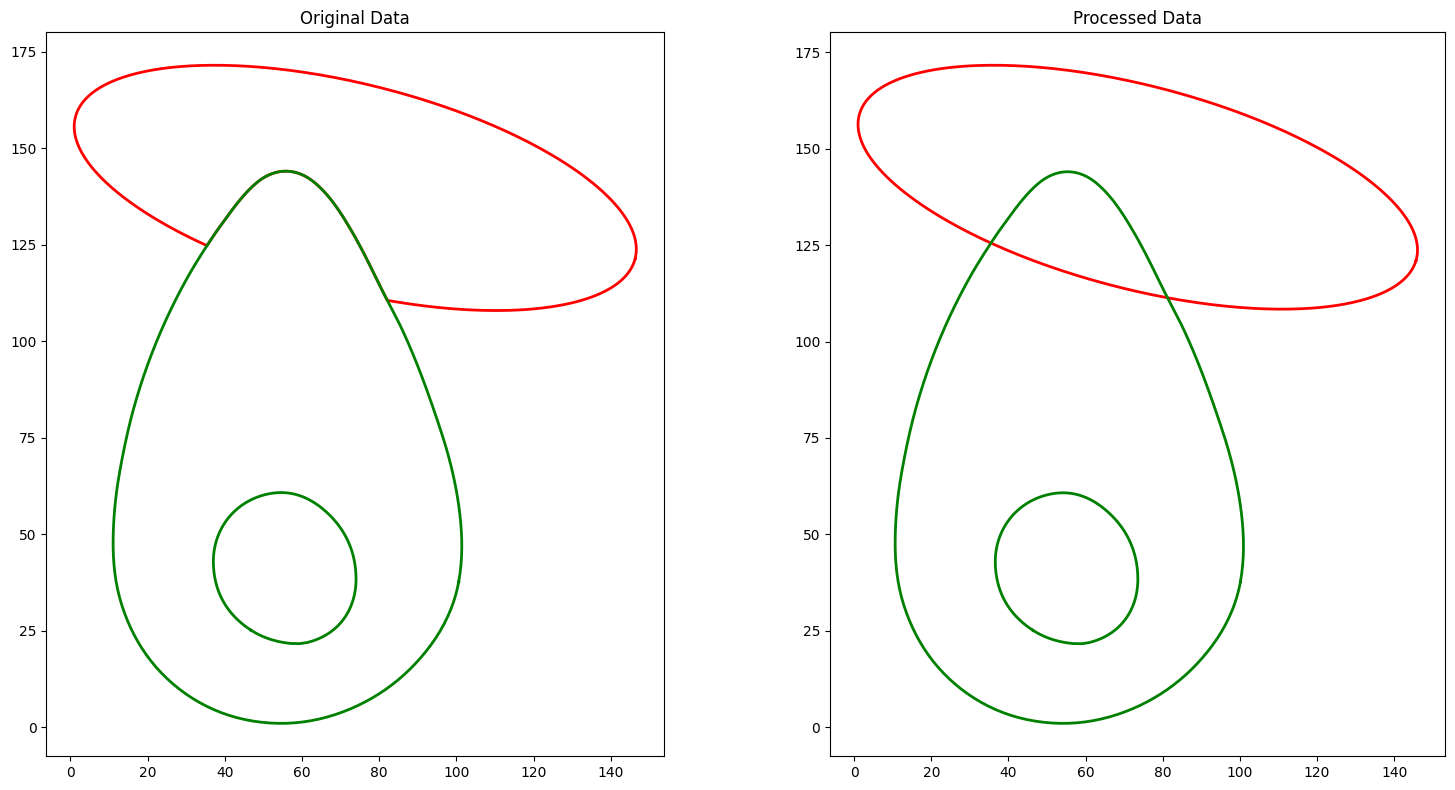

In [ ]:
# Read and process the CSV files
csv_path1 = "/content/drive/MyDrive/Curvetopia/occlusion1.csv"
csv_path2 = "/content/drive/MyDrive/Curvetopia/occlusion1_sol.csv"

output_data1 = read_csv(csv_path1)
output_data2 = read_csv(csv_path2)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plot(output_data2, 'Processed Data', axs[1])
plt.show()

#Regularization of Curve and Shape detection

In [ ]:
# Function to detect the shape based on contour
def detect_shape(cnt):
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)

    if len(approx) == 3:
        return "triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        return "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
    elif len(approx) == 5:
        return "pentagon"
    else:
        return "circle"

# Function to detect star shapes
def detect_star_shape(points):
    center = np.mean(points, axis=0)
    angles = []
    distances = []
    for point in points:
        dx = point[0] - center[0]
        dy = point[1] - center[1]
        angle = math.atan2(dy, dx)
        distance = math.sqrt(dx**2 + dy**2)
        angles.append(angle)
        distances.append(distance)

    angle_diff = [angles[i] - angles[i-1] for i in range(1, len(angles))]
    if np.allclose(angle_diff, angle_diff[0], rtol=0.1) and np.std(distances) / np.mean(distances) < 0.1:
        return points
    else:
        return None

In [ ]:
# Main function to process all shapes
def process_shapes(all_shapes):
    detected_shapes = []

    for shape in all_shapes:
        for cnt in shape:
            detected_shape = detect_shape(np.array([cnt], dtype=np.int32))
            detected_shapes.append(detected_shape)

            # Check for star shapes
            star_shape = detect_star_shape(cnt)
            if star_shape is not None:
                detected_shapes.append("star shape detected")

            # Additional shape detections can be added here
            if detected_shape == "circle":
                # Additional circle detection logic can be added here
                detected_shapes.append("circle detected")
            elif detected_shape in ["rectangle", "square"]:
                # Additional rectangle detection logic can be added here
                detected_shapes.append(f"{detected_shape} detected")
            elif detected_shape == "pentagon":
                # Additional pentagon detection logic can be added here
                detected_shapes.append("pentagon detected")
            elif detected_shape == "triangle":
                # Additional triangle detection logic can be added here
                detected_shapes.append("triangle detected")

    return detected_shapes

In [ ]:
# Path to the curvetopia folder
curvetopia_path = '/content/drive/MyDrive/Curvetopia'

# Load all CSV files
csv_files = [f for f in os.listdir(curvetopia_path) if f.endswith('.csv')]
all_shapes = []

for csv_file in csv_files:
    full_path = os.path.join(curvetopia_path, csv_file)
    shapes = read_csv(full_path)
    all_shapes.extend(shapes)  # Combine all shapes from different files

# Load all SVG files
svg_files = [f for f in os.listdir(curvetopia_path) if f.endswith('.svg')]
all_svg_shapes = []

for svg_file in svg_files:
    full_path = os.path.join(curvetopia_path, svg_file)
    paths, attributes = svg2paths(full_path)
    all_svg_shapes.append(paths)  # Store the paths from the SVG files

In [ ]:
# Process all shapes
detected_shapes = process_shapes(all_shapes)

# Output detected shapes
for shape in detected_shapes:
    print(f"Detected shape: {shape}")

Detected shape: rectangle
Detected shape: rectangle detected
Detected shape: rectangle
Detected shape: rectangle detected
Detected shape: circle
Detected shape: circle detected
Detected shape: triangle
Detected shape: triangle detected
Detected shape: triangle
Detected shape: triangle detected
Detected shape: circle
Detected shape: circle detected
Detected shape: rectangle
Detected shape: rectangle detected
Detected shape: rectangle
Detected shape: rectangle detected
Detected shape: rectangle
Detected shape: rectangle detected
Detected shape: rectangle
Detected shape: rectangle detected
Detected shape: circle
Detected shape: circle detected
Detected shape: circle
Detected shape: circle detected
Detected shape: circle
Detected shape: circle detected
Detected shape: circle
Detected shape: circle detected
Detected shape: circle
Detected shape: star shape detected
Detected shape: circle detected
Detected shape: circle
Detected shape: star shape detected
Detected shape: circle detected
Dete

Evaluation

In [ ]:
!pip install svglib

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM

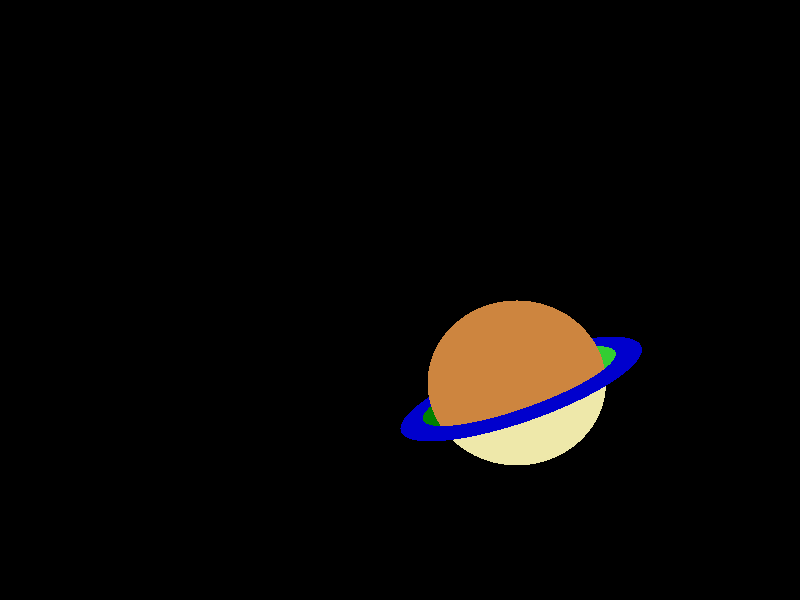

-1

In [ ]:
image=cv2.imread('/content/drive/MyDrive/Curvetopia/occlusion2_rec.png',cv2.IMREAD_COLOR)
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(5000)


https://www.qcad.org/rsforum/viewtopic.php?t=7497

In [ ]:
# Import the required modules
!pip install svglib reportlab cairosvg

from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM
import cairosvg
import cv2
from google.colab.patches import cv2_imshow

Displaying original image for: frag0.svg


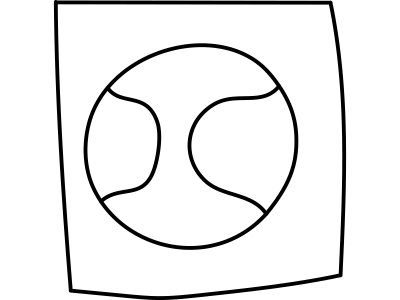

Displaying grayscale image for: frag0.svg


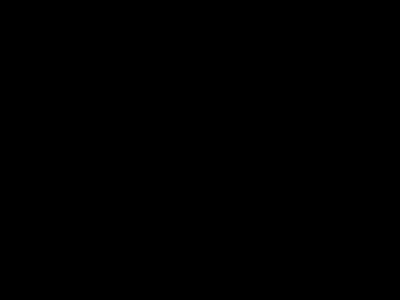

Displaying detected shapes for: frag0.svg


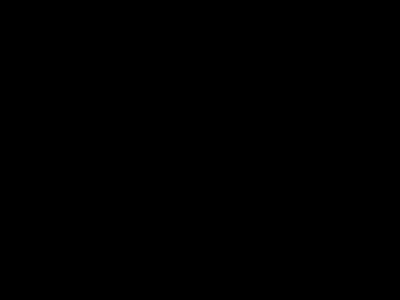

Displaying original image for: occlusion1.svg


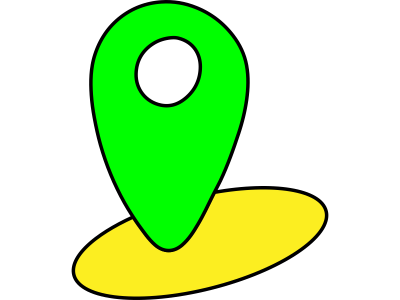

Displaying grayscale image for: occlusion1.svg


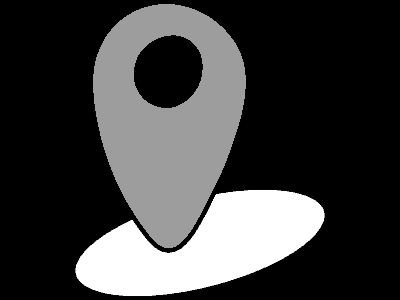

Displaying detected shapes for: occlusion1.svg


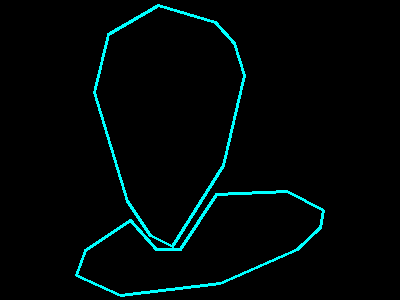

Displaying original image for: occlusion2_sol_rec.svg


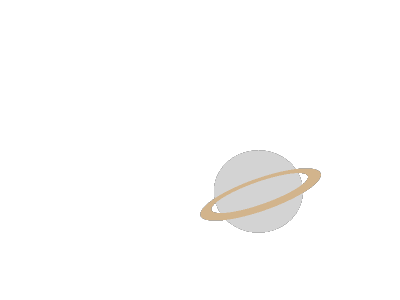

Displaying grayscale image for: occlusion2_sol_rec.svg


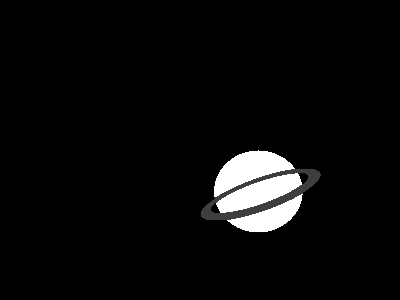

Displaying detected shapes for: occlusion2_sol_rec.svg


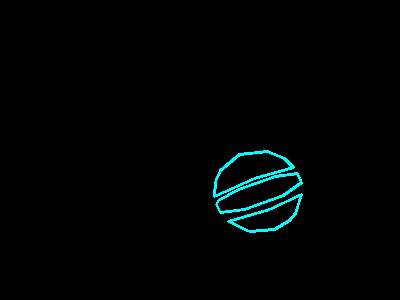

Displaying original image for: frag01_sol.svg


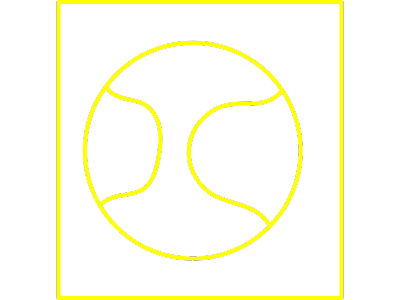

Displaying grayscale image for: frag01_sol.svg


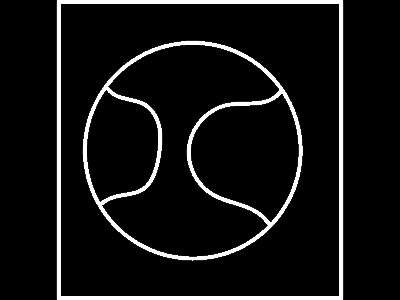

Displaying detected shapes for: frag01_sol.svg


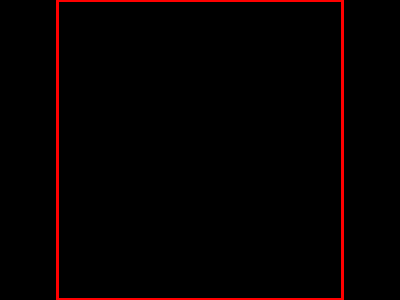

Displaying original image for: occlusion1_rec.svg


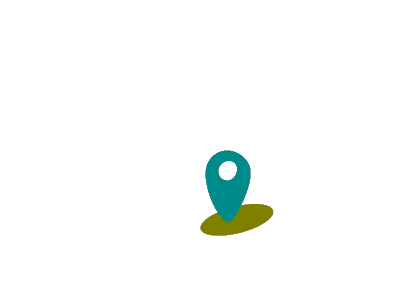

Displaying grayscale image for: occlusion1_rec.svg


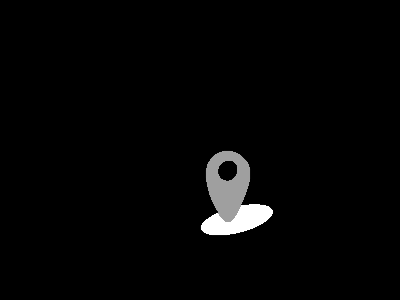

Displaying detected shapes for: occlusion1_rec.svg


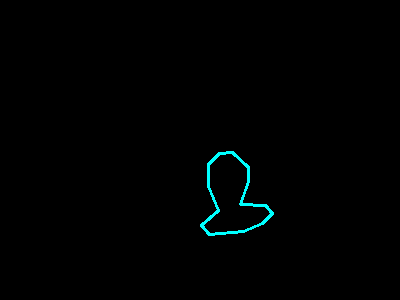

Displaying original image for: frag1.svg


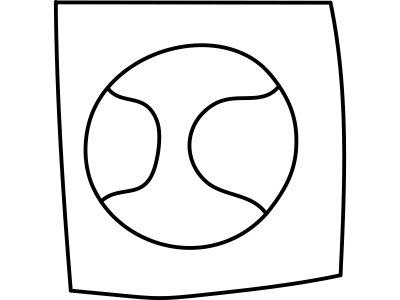

Displaying grayscale image for: frag1.svg


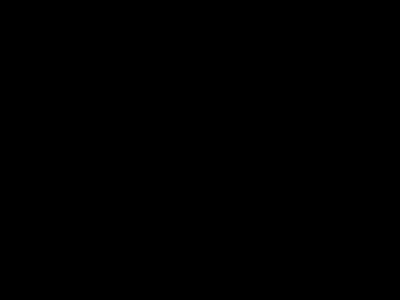

Displaying detected shapes for: frag1.svg


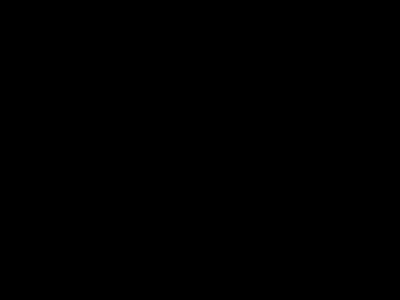

Displaying original image for: occlusion2_sol.svg


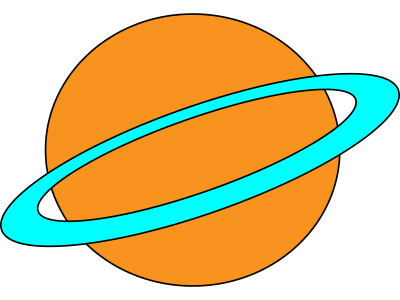

Displaying grayscale image for: occlusion2_sol.svg


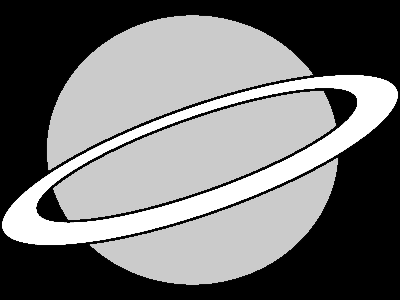

Displaying detected shapes for: occlusion2_sol.svg


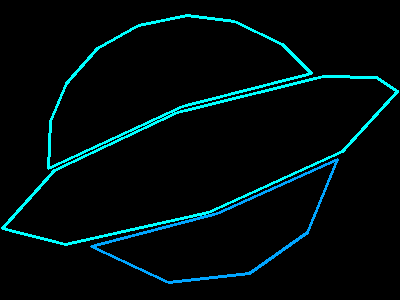

Displaying original image for: isolated.svg


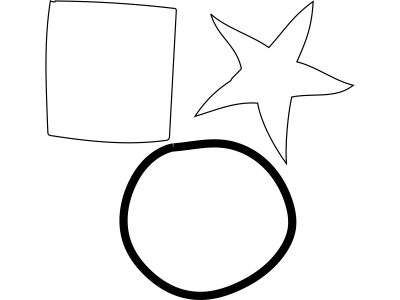

Displaying grayscale image for: isolated.svg


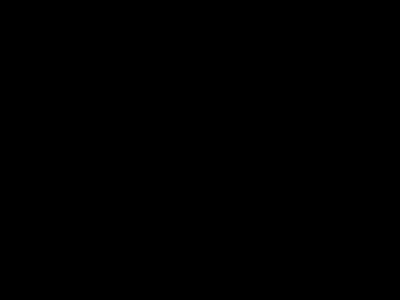

Displaying detected shapes for: isolated.svg


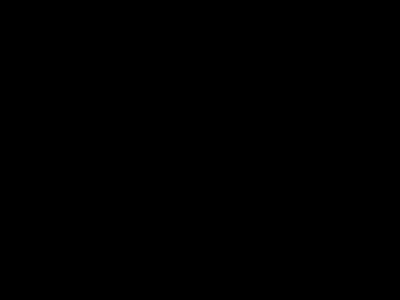

Displaying original image for: frag2_sol.svg


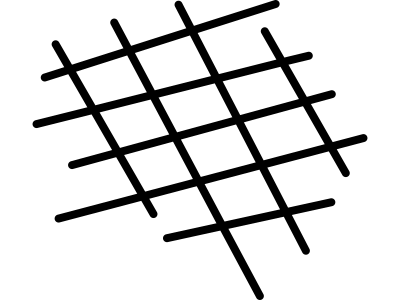

Displaying grayscale image for: frag2_sol.svg


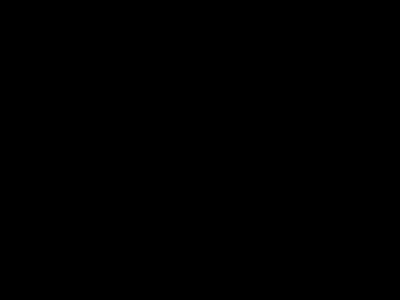

Displaying detected shapes for: frag2_sol.svg


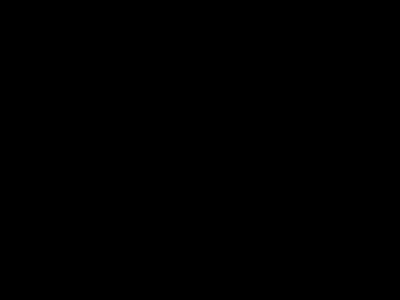

Displaying original image for: occlusion1_sol.svg


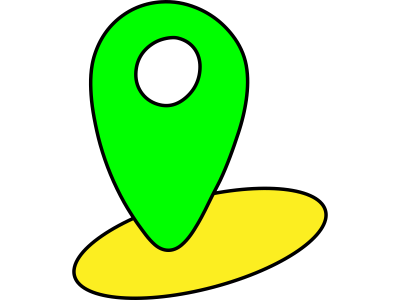

Displaying grayscale image for: occlusion1_sol.svg


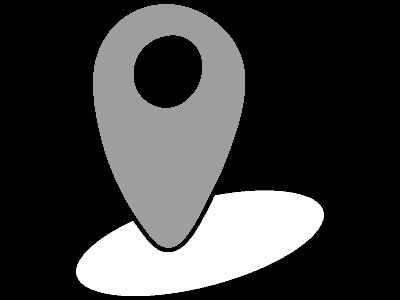

Displaying detected shapes for: occlusion1_sol.svg


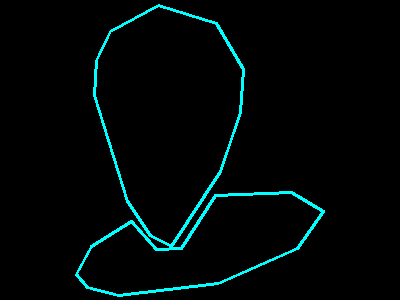

Displaying original image for: occlusion1_sol_rec.svg


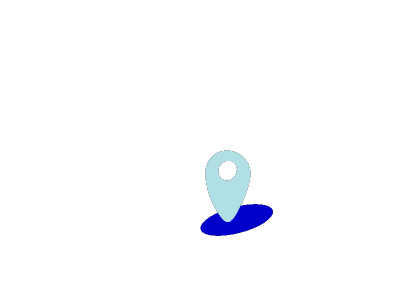

Displaying grayscale image for: occlusion1_sol_rec.svg


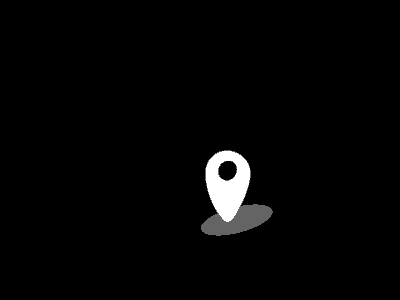

Displaying detected shapes for: occlusion1_sol_rec.svg


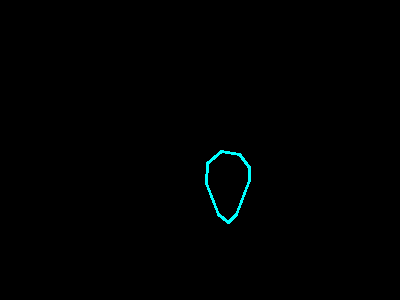

Displaying original image for: isolated_sol.svg


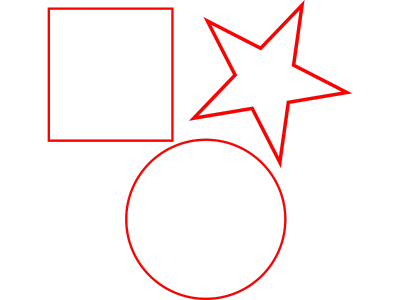

Displaying grayscale image for: isolated_sol.svg


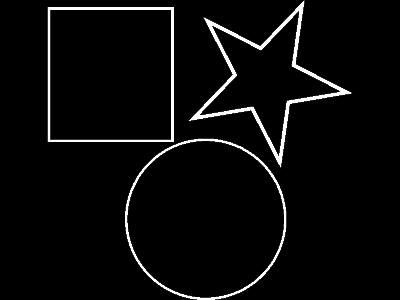

Displaying detected shapes for: isolated_sol.svg


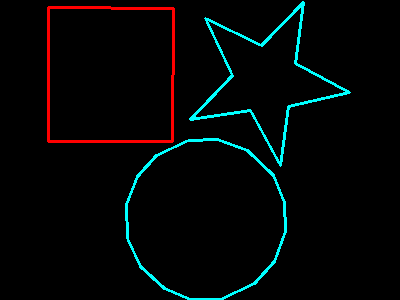

Displaying original image for: occlusion2_rec.svg


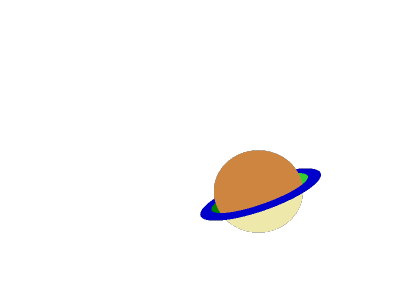

Displaying grayscale image for: occlusion2_rec.svg


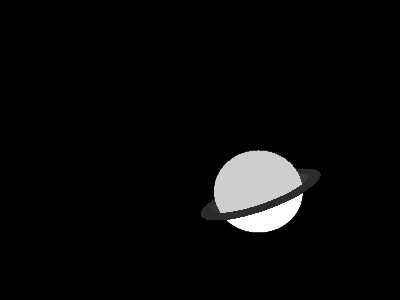

Displaying detected shapes for: occlusion2_rec.svg


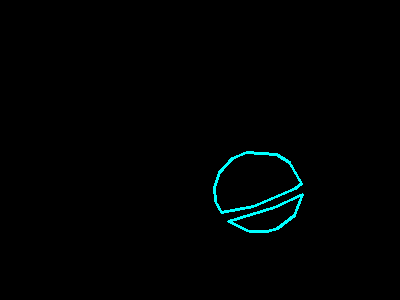

Displaying original image for: frag2.svg


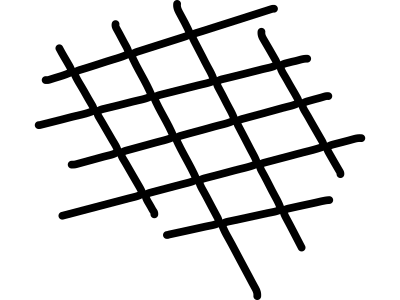

Displaying grayscale image for: frag2.svg


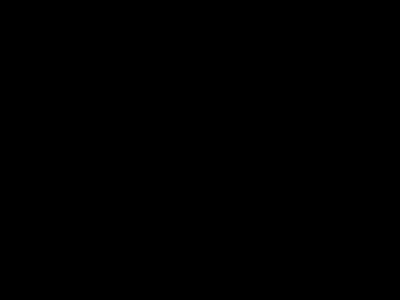

Displaying detected shapes for: frag2.svg


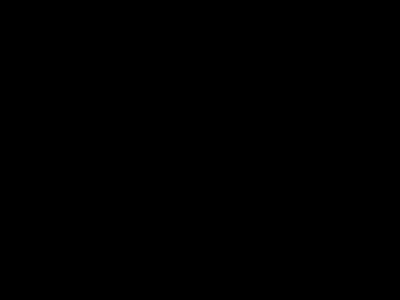

Displaying original image for: occlusion2.svg


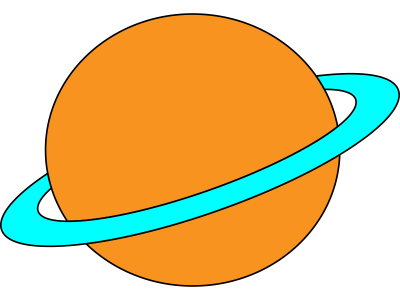

Displaying grayscale image for: occlusion2.svg


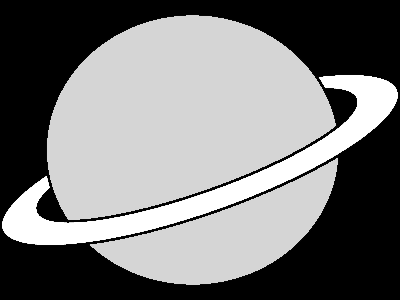

Displaying detected shapes for: occlusion2.svg


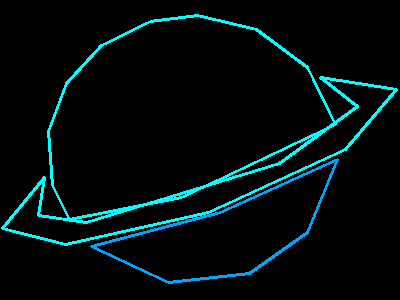

Displaying original image for: detected_shapes_isolated.svg


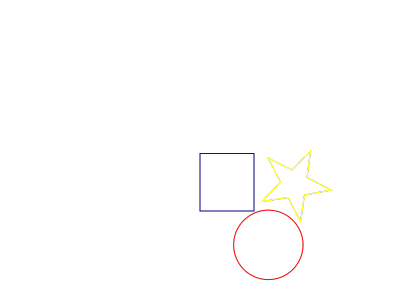

Displaying grayscale image for: detected_shapes_isolated.svg


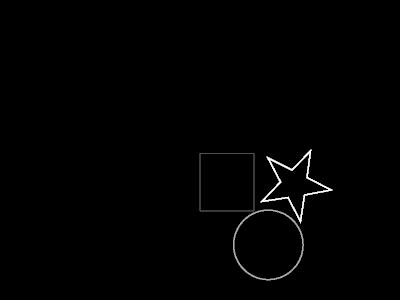

Displaying detected shapes for: detected_shapes_isolated.svg


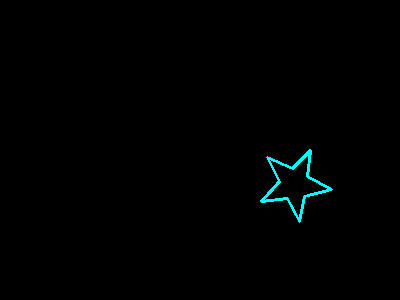

In [ ]:
import os
import cairosvg
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from xml.etree import ElementTree as ET

# Define the directory containing SVG images
directory_path = '/content/drive/MyDrive/Curvetopia/'

# Get a list of all SVG files in the directory
svg_files = [f for f in os.listdir(directory_path) if f.endswith('.svg')]

# Default dimensions for resizing
output_width = 400  # Desired width
output_height = 300  # Desired height

# Process each SVG file
for svg_file in svg_files:
    # Define the full paths for input SVG and output PNG
    image_path = os.path.join(directory_path, svg_file)
    png_path = os.path.join(directory_path, svg_file.replace('.svg', '.png'))

    # Check if the SVG has defined dimensions
    try:
        tree = ET.parse(image_path)
        root = tree.getroot()
        width = root.get('width')
        height = root.get('height')

        # If width and height are not defined, use default values
        if width is None or height is None:
            width = 800
            height = 600
        else:
            # Handle percentage values
            if '%' in width:
                width = (800 * float(width.replace('%', '')) / 100)
            else:
                width = float(width.replace('px', ''))

            if '%' in height:
                height = (600 * float(height.replace('%', '')) / 100)
            else:
                height = float(height.replace('px', ''))

        # Convert SVG to PNG using cairosvg with a transparent background
        cairosvg.svg2png(url=image_path, write_to=png_path, output_width=int(width), output_height=int(height))

        # Load the PNG image
        image = cv2.imread(png_path, cv2.IMREAD_UNCHANGED)  # Load with alpha channel if present

        # Check if the image is loaded successfully
        if image is not None:
            # Resize the image to the desired output dimensions
            resized_image = cv2.resize(image, (output_width, output_height))

            # Convert the resized image to grayscale
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

            # Apply histogram equalization to enhance contrast
            gray_image = cv2.equalizeHist(gray_image)

            # Create a black background for the grayscale image
            black_background = np.zeros((output_height, output_width), dtype=np.uint8)

            # Overlay the grayscale image on the black background
            black_background[gray_image > 0] = gray_image[gray_image > 0]

            # Display the original image with transparent background
            print(f"Displaying original image for: {svg_file}")
            cv2_imshow(resized_image)

            # Display the grayscale image on a black background
            print(f"Displaying grayscale image for: {svg_file}")
            cv2_imshow(black_background)

            # Apply Gaussian blur to the grayscale image to smooth edges
            blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

            # Apply thresholding to create a binary image
            _, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

            # Detect contours
            contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Create a blank canvas to draw the detected shapes
            canvas = np.zeros((output_height, output_width, 3), dtype=np.uint8)

            for contour in contours:
                # Approximate the contour to a polygon
                epsilon = 0.01 * cv2.arcLength(contour, True)
                approx = cv2.approxPolyDP(contour, epsilon, True)

                # Classify and draw the shape
                num_vertices = len(approx)
                if num_vertices == 3:
                    # Triangle
                    cv2.drawContours(canvas, [approx], 0, (0, 255, 0), 2)  # Green
                elif num_vertices == 4:
                    # Rectangle or square
                    cv2.drawContours(canvas, [approx], 0, (0, 0, 255), 2)  # Red
                elif num_vertices == 5:
                    # Pentagon
                    cv2.drawContours(canvas, [approx], 0, (255, 0, 255), 2)  # Magenta
                elif num_vertices == 6:
                    # Hexagon
                    cv2.drawContours(canvas, [approx], 0, (255, 165, 0), 2)  # Orange
                elif num_vertices > 6:
                    # Other polygons
                    cv2.drawContours(canvas, [approx], 0, (255, 255, 0), 2)  # Yellow

            # Save the result
            output_path = os.path.join(directory_path, 'detected_shapes.png')
            cv2.imwrite(output_path, canvas)

            # Load and display the result in a new cell
            detected_shapes = cv2.imread(output_path)
            print(f"Displaying detected shapes for: {svg_file}")
            cv2_imshow(detected_shapes)

        else:
            print(f"Image loading failed for {png_path}. Check the file path and format.")

    except Exception as e:
        print(f"Error processing {svg_file}: {e}")

In [ ]:
import svgwrite

In [ ]:
# Function to detect shapes and generate a new SVG
def detect_shapes_and_create_svg(image_path, svg_output_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # Detect contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an SVG drawing
    dwg = svgwrite.Drawing(svg_output_path, profile='tiny')

    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Get the coordinates of the shape
        points = [(float(point[0][0]), float(point[0][1])) for point in approx]

        # Classify and draw the shape
        if len(approx) == 3:
            # Triangle
            dwg.add(dwg.polygon(points, fill='none', stroke='green', stroke_width=2))
        elif len(approx) == 4:
            # Rectangle or square
            dwg.add(dwg.polygon(points, fill='none', stroke='blue', stroke_width=2))
        elif len(approx) > 10:
            # Circle (approximated as an ellipse in SVG)
            (x, y), (MA, ma), angle = cv2.fitEllipse(contour)
            dwg.add(dwg.ellipse(center=(float(x), float(y)), r=(float(MA)/2, float(ma)/2), fill='none', stroke='red', stroke_width=2))
        else:
            # Other polygons
            dwg.add(dwg.polygon(points, fill='none', stroke='yellow', stroke_width=2))

    # Save the SVG file
    dwg.save()


In [ ]:
png_file = '/content/drive/MyDrive/Curvetopia/test1.png'
svg_output_file = '/content/drive/MyDrive/Curvetopia/detected_shapes_isolated.svg'

# Detect shapes and create a new SVG
detect_shapes_and_create_svg(png_file, svg_output_file)
svg_output_file

'/content/drive/MyDrive/Curvetopia/detected_shapes_isolated.svg'

#Symmetry Identification

In [ ]:
from svgpathtools import svg2paths2
from scipy.spatial.distance import cdist

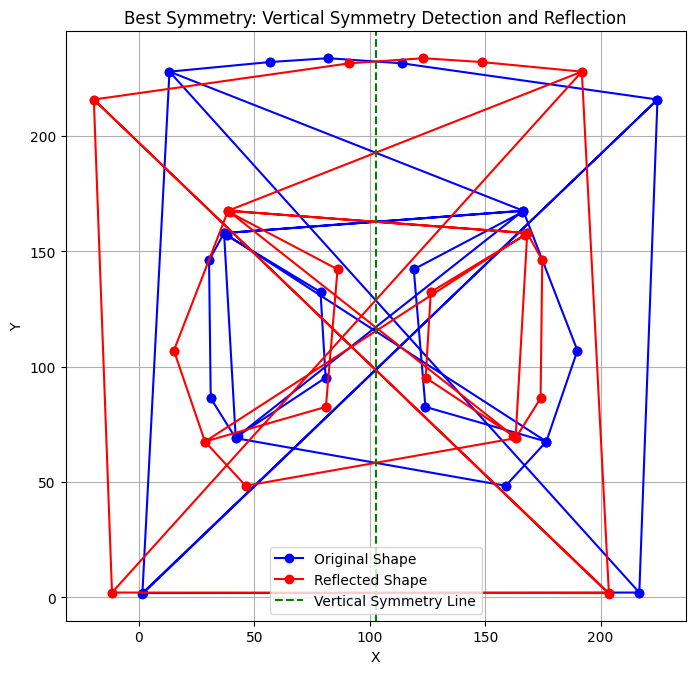

In [ ]:
from svgpathtools import svg2paths2
from scipy.spatial.distance import cdist

# Function to extract points from SVG file
def extract_points_from_svg(svg_path):
    paths, attributes, svg_attributes = svg2paths2(svg_path)
    points = []
    for path in paths:
        for seg in path:
            if hasattr(seg, 'start'):
                points.append([seg.start.real, seg.start.imag])
            if hasattr(seg, 'end'):
                points.append([seg.end.real, seg.end.imag])
    return np.array(points)

# Function to plot original and reflected shapes with the symmetry line
def plot_shapes_with_symmetry_line(original_points, reflected_points, symmetry_type, symmetry_line=None):
    plt.figure(figsize=(8, 8))
    plt.plot(original_points[:, 0], original_points[:, 1], 'bo-', label='Original Shape')
    plt.plot(reflected_points[:, 0], reflected_points[:, 1], 'ro-', label='Reflected Shape')

    if symmetry_type == 'vertical':
        plt.axvline(x=symmetry_line, color='g', linestyle='--', label='Vertical Symmetry Line')
    elif symmetry_type == 'horizontal':
        plt.axhline(y=symmetry_line, color='g', linestyle='--', label='Horizontal Symmetry Line')
    elif symmetry_type == 'diagonal':
        plt.plot(symmetry_line[:, 0], symmetry_line[:, 1], 'g--', label='Diagonal Symmetry Line')
    elif symmetry_type == 'radial':
        plt.plot(symmetry_line[:, 0], symmetry_line[:, 1], 'g--', label='Radial Symmetry Line')

    plt.title(f"Best Symmetry: {symmetry_type.capitalize()} Symmetry Detection and Reflection")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Function to find symmetric points and reflect the shape
def find_and_reflect_symmetry(points, symmetry_type='vertical'):
    if symmetry_type == 'vertical':
        axis = 0
        midpoint = np.mean(points[:, axis])
        reflected_points = points.copy()
        reflected_points[:, axis] = 2 * midpoint - reflected_points[:, axis]
        return reflected_points, midpoint

    elif symmetry_type == 'horizontal':
        axis = 1
        midpoint = np.mean(points[:, axis])
        reflected_points = points.copy()
        reflected_points[:, axis] = 2 * midpoint - reflected_points[:, axis]
        return reflected_points, midpoint

    elif symmetry_type == 'diagonal':
        reflected_points = np.dot(points, [[1, -1], [-1, 1]])
        return reflected_points, None  # Diagonal line will be plotted later

    elif symmetry_type == 'radial':
        midpoint = np.mean(points, axis=0)
        reflected_points = 2 * midpoint - points
        return reflected_points, midpoint

# Function to evaluate symmetry
def evaluate_symmetry(original_points, reflected_points):
    return np.sum(np.min(cdist(original_points, reflected_points), axis=1))

# Main function to read SVG, find best symmetry, and plot results
def main(svg_file_path):
    try:
        points = extract_points_from_svg(svg_file_path)
        best_symmetry = None
        best_reflected_points = None
        best_score = float('inf')
        best_symmetry_line = None

        for symmetry_type in ['vertical', 'horizontal', 'diagonal', 'radial']:
            reflected_points, symmetry_line = find_and_reflect_symmetry(points, symmetry_type=symmetry_type)
            score = evaluate_symmetry(points, reflected_points)
            if score < best_score:
                best_score = score
                best_symmetry = symmetry_type
                best_reflected_points = reflected_points
                best_symmetry_line = symmetry_line

        if best_symmetry == 'diagonal':
            symmetry_line = np.array([[0, 0], [1, 1]]) * np.max(points) * 2

        plot_shapes_with_symmetry_line(points, best_reflected_points, best_symmetry, best_symmetry_line)
    except Exception as e:
        print(f"Error processing SVG file: {e}")

# Example usage for the uploaded files
svg_file_path = '/content/drive/MyDrive/Curvetopia/frag0.svg'

# Run the main function
main(svg_file_path)


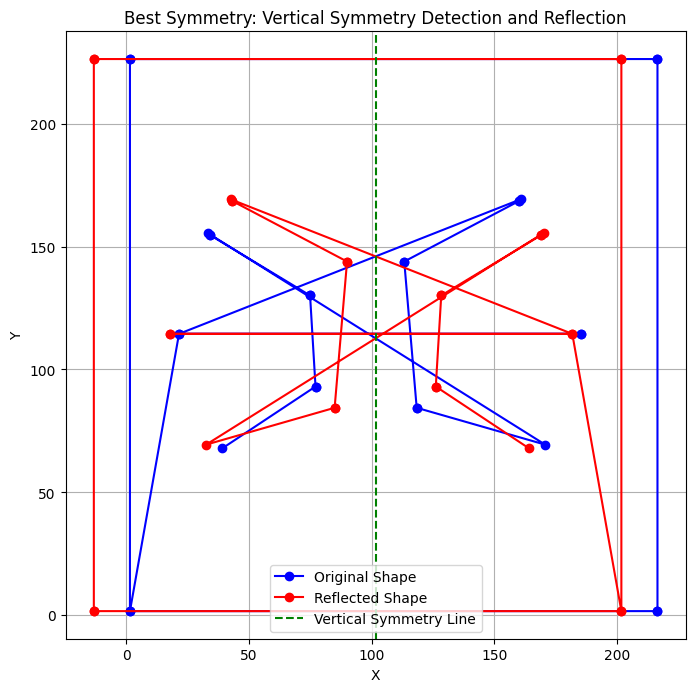

In [ ]:

# Example usage for the uploaded files
svg_file_path = '/content/drive/MyDrive/Curvetopia/frag01_sol.svg'

# Run the main function
main(svg_file_path)

Error processing SVG file: too many indices for array: array is 1-dimensional, but 2 were indexed


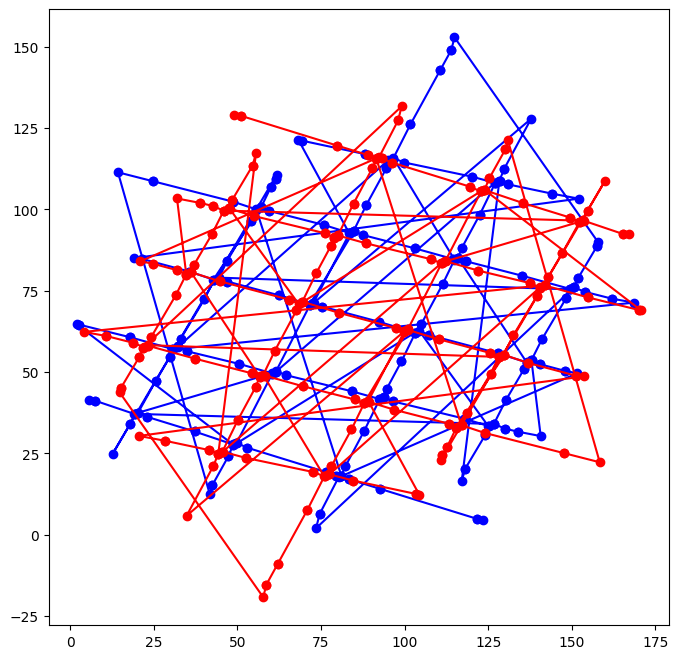

In [ ]:
# Example usage for the uploaded files
svg_file_path = '/content/drive/MyDrive/Curvetopia/frag2.svg'

# Run the main function
main(svg_file_path)

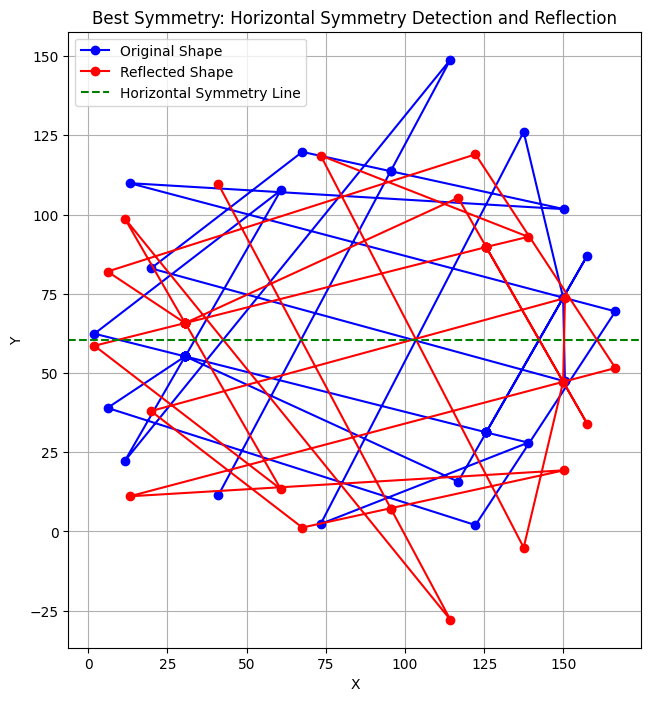

In [ ]:
# Example usage for the uploaded files
svg_file_path = '/content/drive/MyDrive/Curvetopia/frag2_sol.svg'

# Run the main function
main(svg_file_path)

Completing the Curve

In [ ]:
import os
from svgpathtools import svg2paths2
import numpy as np
from scipy.spatial import KDTree

def read_all_svgs(directory_path):
    svg_files = [f for f in os.listdir(directory_path) if f.endswith('.svg')]
    all_regularized_curves = []

    for svg_file in svg_files:
        svg_path = os.path.join(directory_path, svg_file)
        paths, attributes, svg_attributes = svg2paths2(svg_path)

        # Convert paths to numpy arrays
        for path in paths:
            # Sample 100 points along the path
            num_points = 100
            sampled_points = [path.point(t) for t in np.linspace(0, 1, num_points)]
            all_regularized_curves.append(np.column_stack((np.real(sampled_points), np.imag(sampled_points))))

    return all_regularized_curves

def complete_curves(curves):
    completed_curves = []

    for curve in curves:
        points = np.vstack(curve)  # Stack points to create a 2D array
        tree = KDTree(points)  # Create a KDTree for nearest neighbor search
        completed_curve = []

        for point in points:
            # Find neighbors within a certain radius
            neighbors = tree.query_ball_point(point, r=5)  # Adjust radius as necessary

            if neighbors:
                # If neighbors are found, calculate the mean position
                neighbor_points = points[neighbors]
                mean_point = np.mean(neighbor_points, axis=0)
                completed_curve.append(mean_point)
            else:
                completed_curve.append(point)  # No neighbors found, keep original point

        completed_curves.append(np.array(completed_curve))

    return completed_curves

In [ ]:
# Define the directory containing SVG images
directory_path = '/content/drive/MyDrive/Curvetopia/'

# Read all SVG files and store regularized curves
all_regularized_curves = read_all_svgs(directory_path)

# Print the number of curves loaded
print(f"Loaded {len(all_regularized_curves)} regularized curves from SVG files.")

# Complete the curves
completed_curves = complete_curves(all_regularized_curves)

# Print the completed curves
for i, completed_curve in enumerate(completed_curves):
    print(f"Completed Curve {i}:")
    print(completed_curve)

Streaming output truncated to the last 5000 lines.
 [ 64.76138384  20.29976768]
 [ 63.58861616  20.67323232]
 [ 62.41584848  21.04669697]
 [ 61.24308081  21.42016162]
 [ 60.07031313  21.79362626]
 [ 58.89754545  22.16709091]
 [ 57.72477778  22.54055556]
 [ 56.5520101   22.9140202 ]
 [ 55.37924242  23.28748485]
 [ 54.20647475  23.66094949]
 [ 53.03370707  24.03441414]
 [ 51.86093939  24.40787879]
 [ 50.68817172  24.78134343]
 [ 49.51540404  25.15480808]
 [ 48.34263636  25.52827273]
 [ 47.16986869  25.90173737]
 [ 45.99710101  26.27520202]
 [ 44.82433333  26.64866667]
 [ 43.65156566  27.02213131]
 [ 42.47879798  27.39559596]
 [ 41.3060303   27.76906061]
 [ 40.13326263  28.14252525]
 [ 38.96049495  28.5159899 ]
 [ 37.78772727  28.88945455]
 [ 36.6149596   29.26291919]
 [ 35.44219192  29.63638384]
 [ 34.26942424  30.00984848]
 [ 33.09665657  30.38331313]
 [ 31.92388889  30.75677778]
 [ 30.75112121  31.13024242]
 [ 29.57835354  31.50370707]
 [ 28.40558586  31.87717172]
 [ 27.23281818  32.25

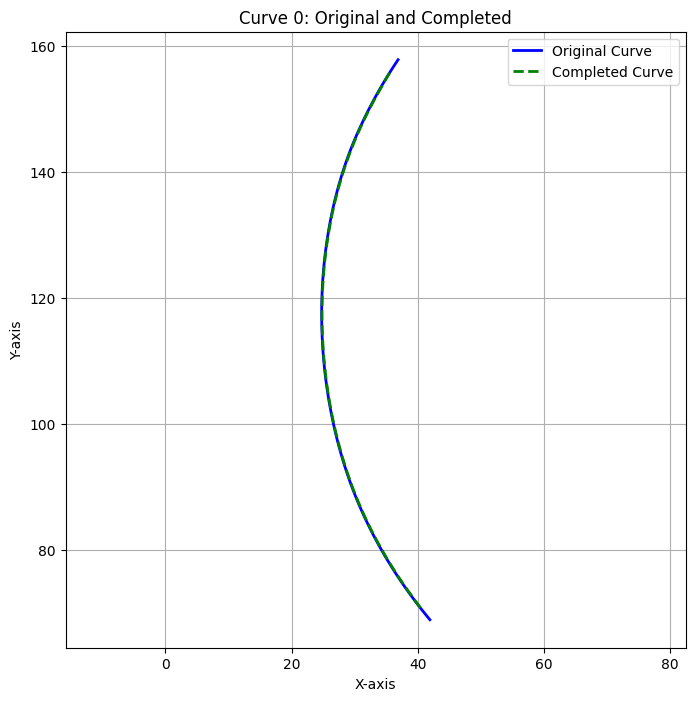

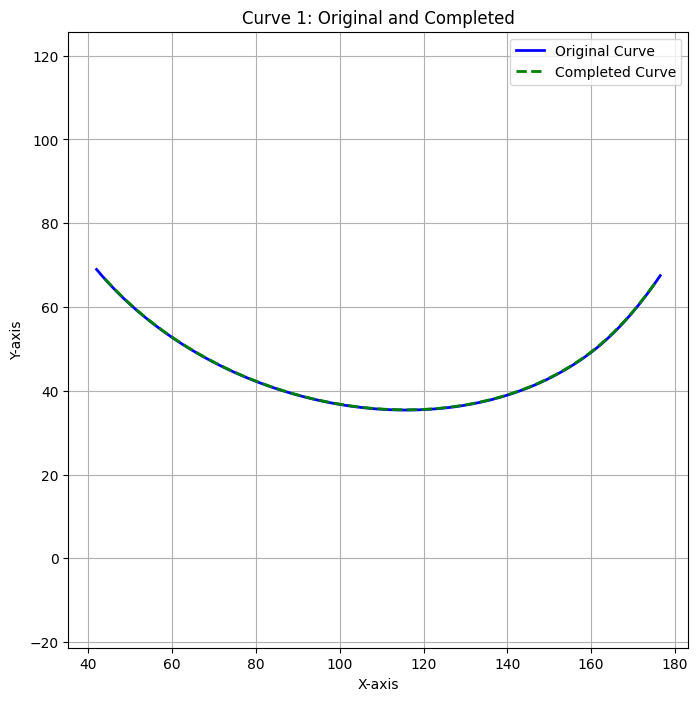

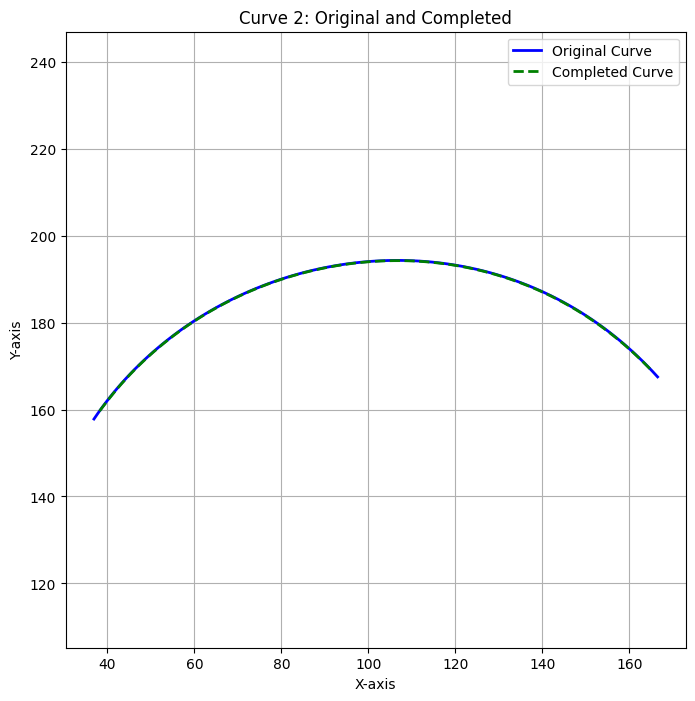

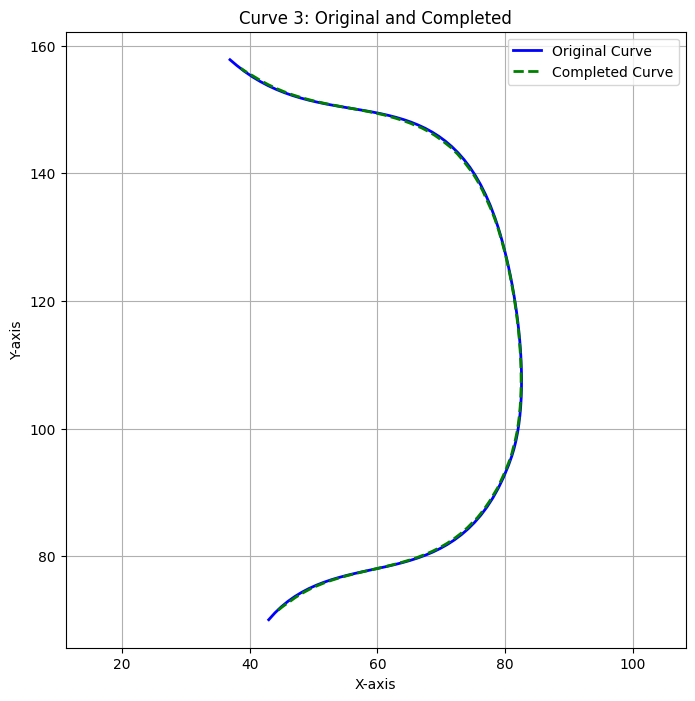

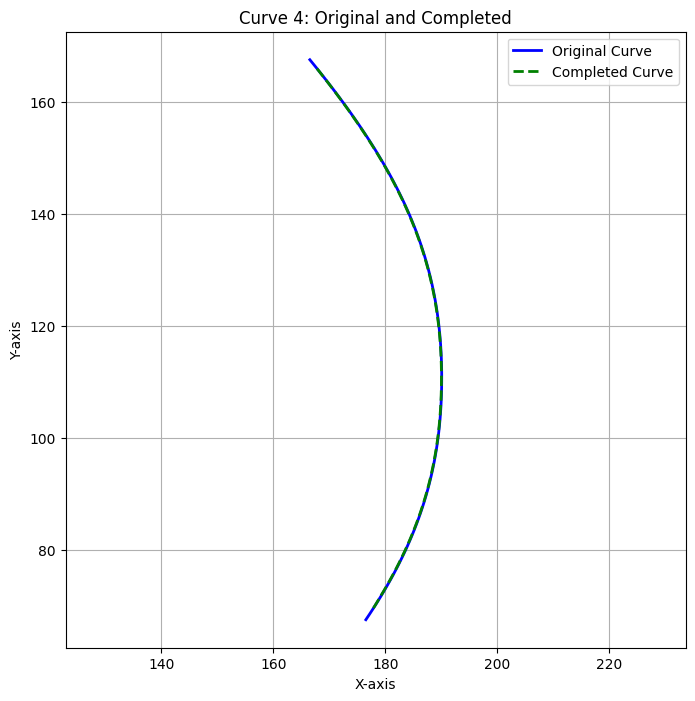

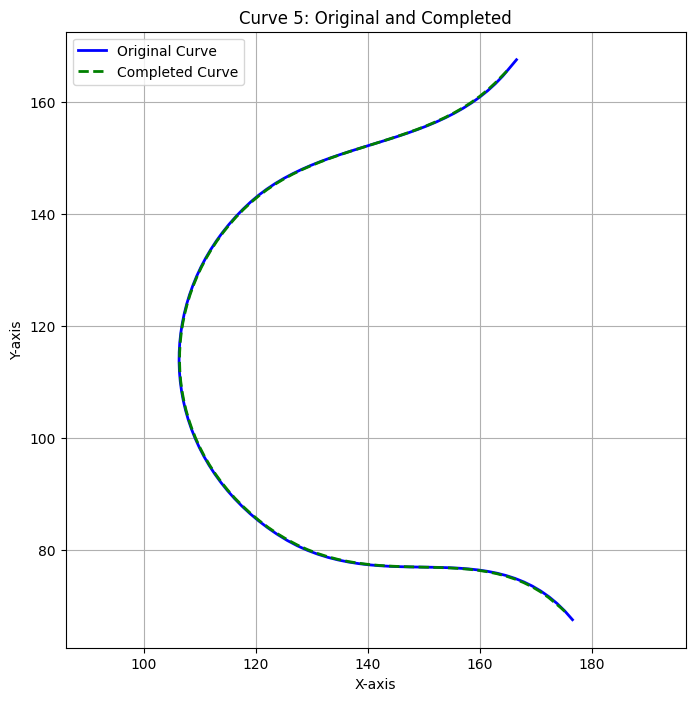

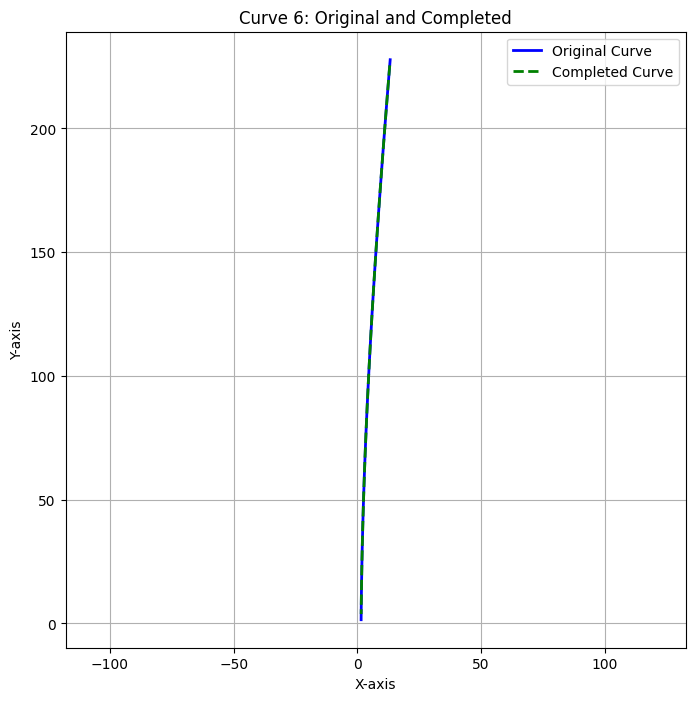

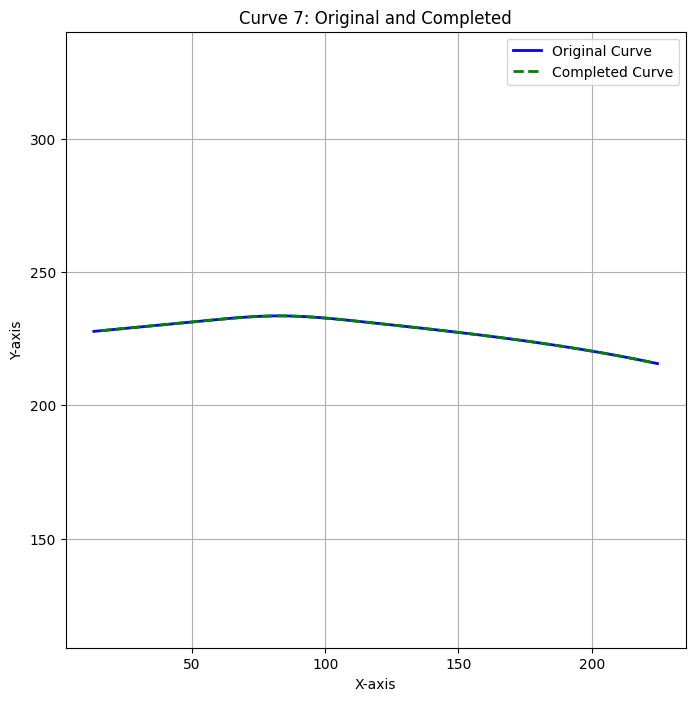

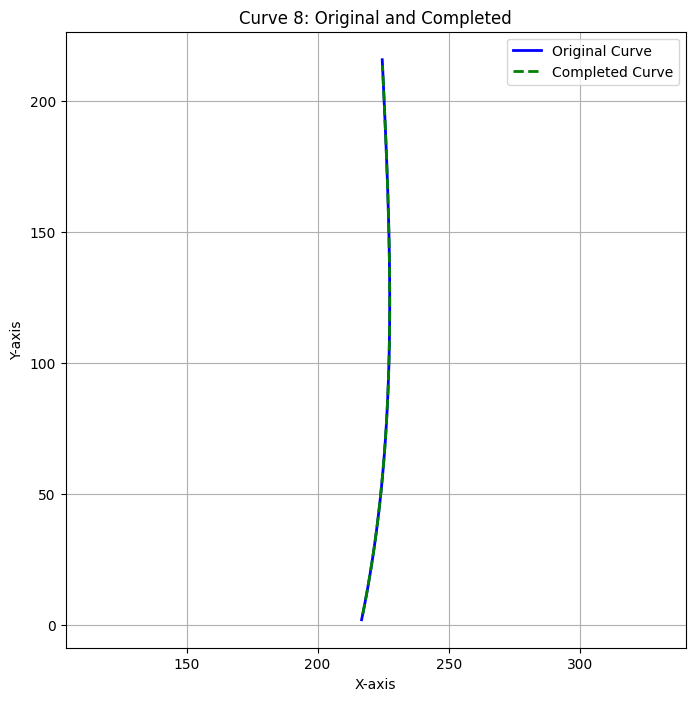

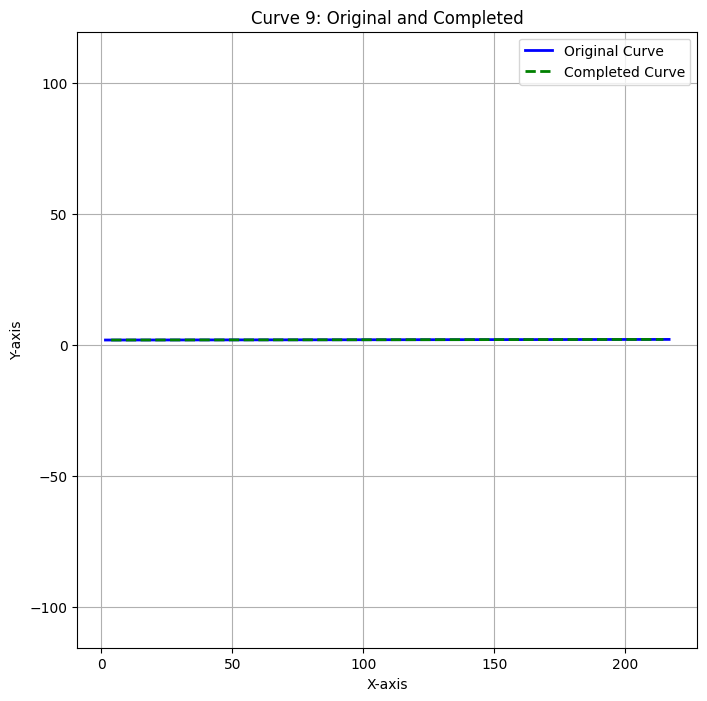

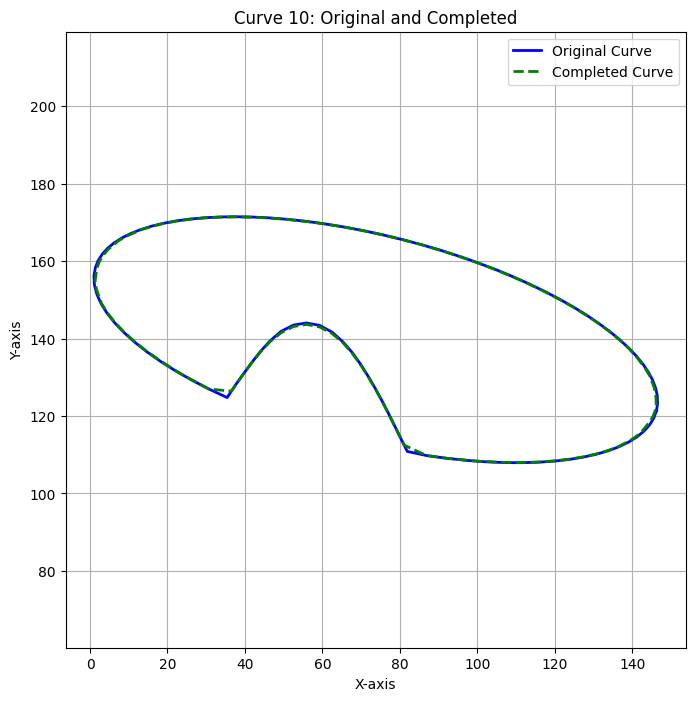

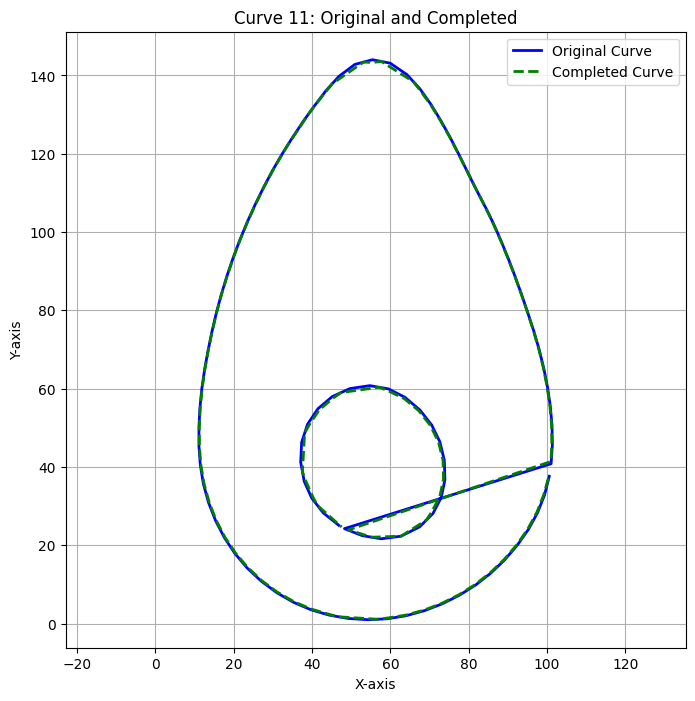

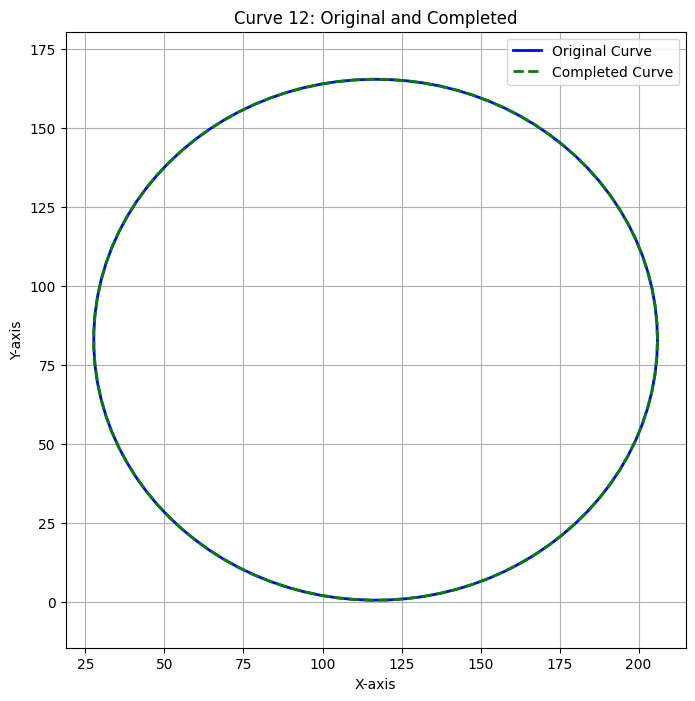

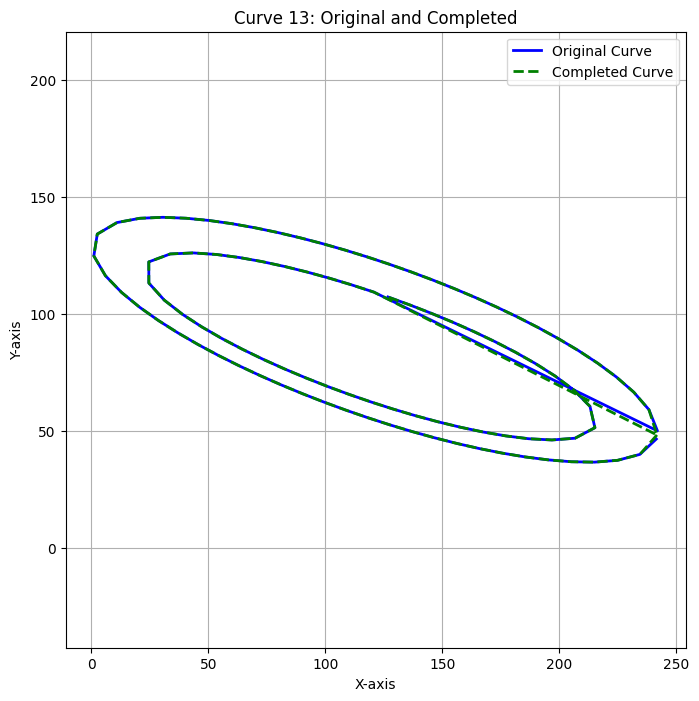

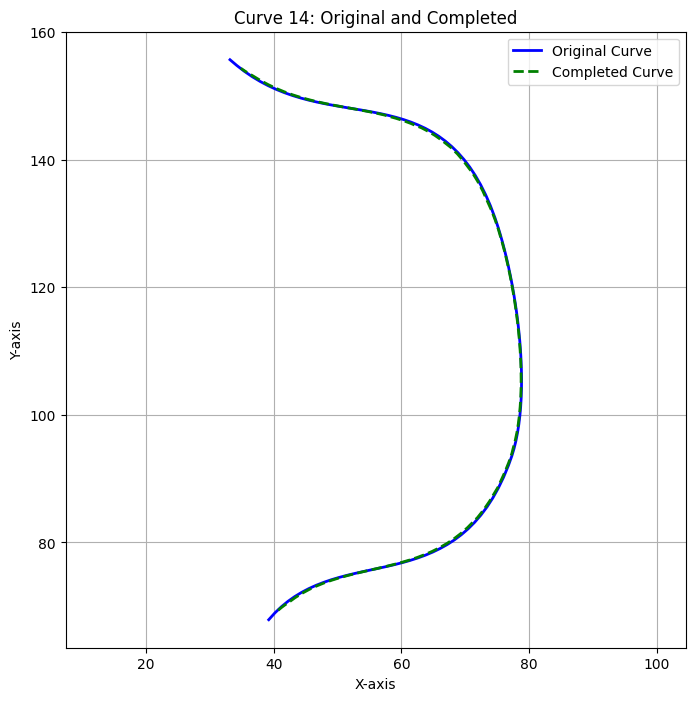

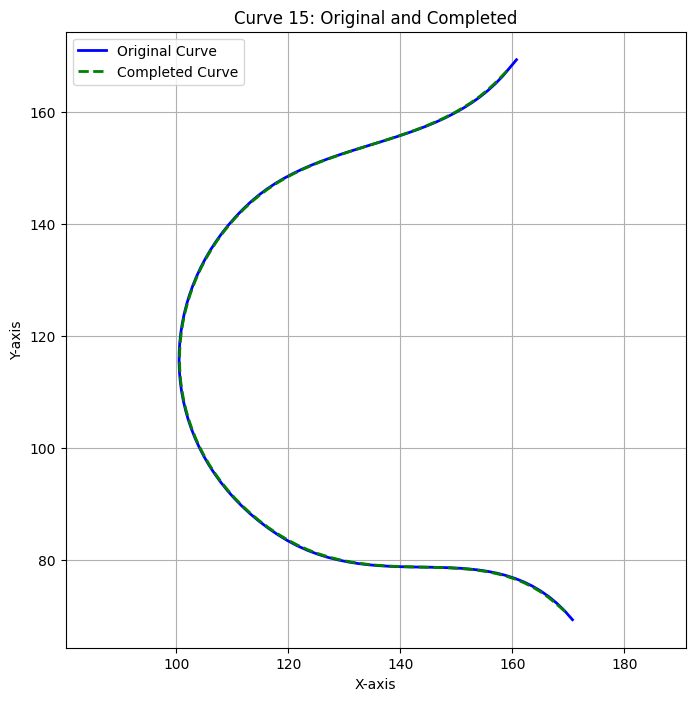

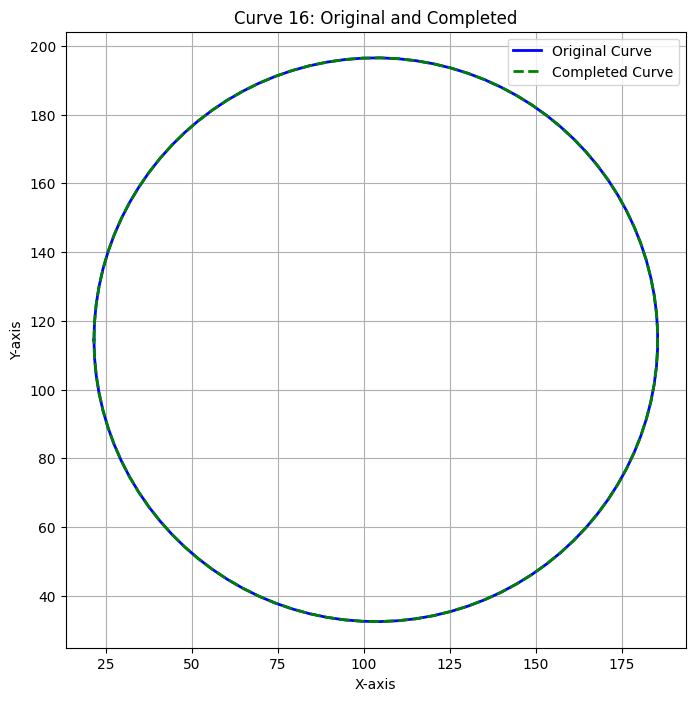

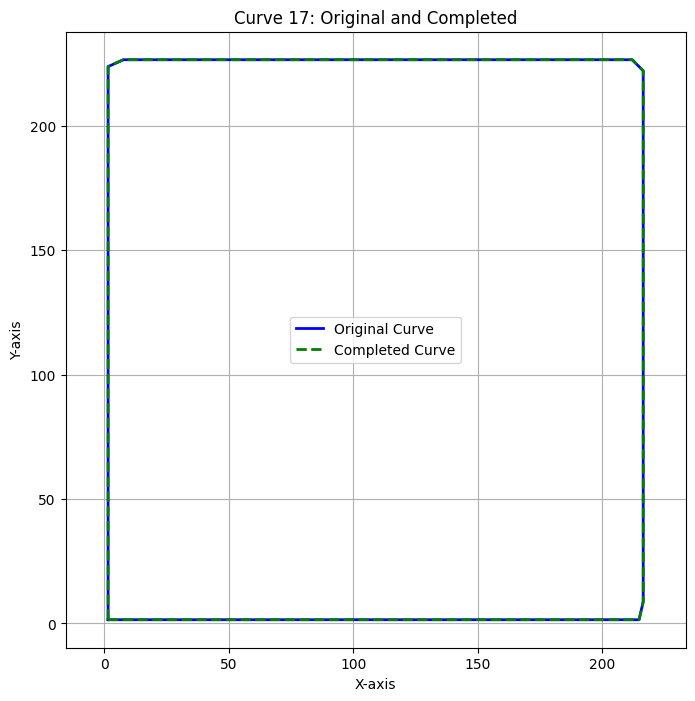

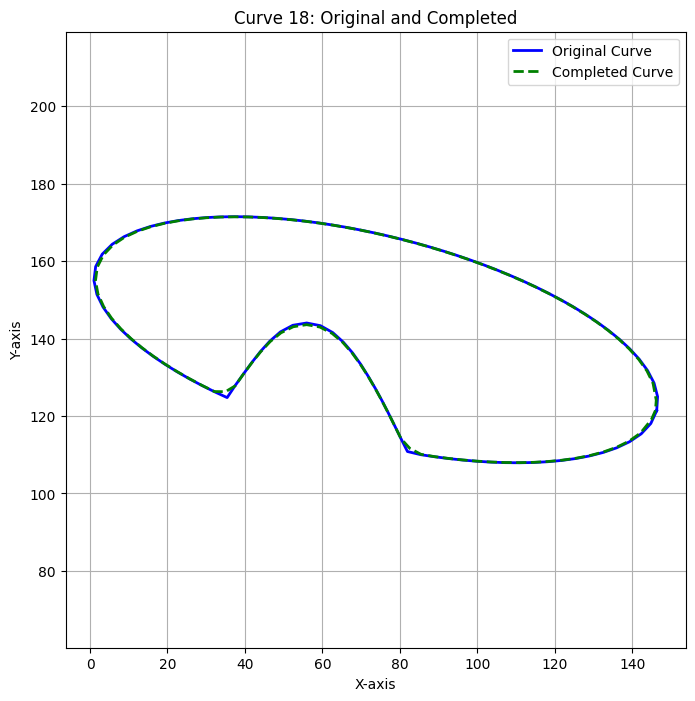

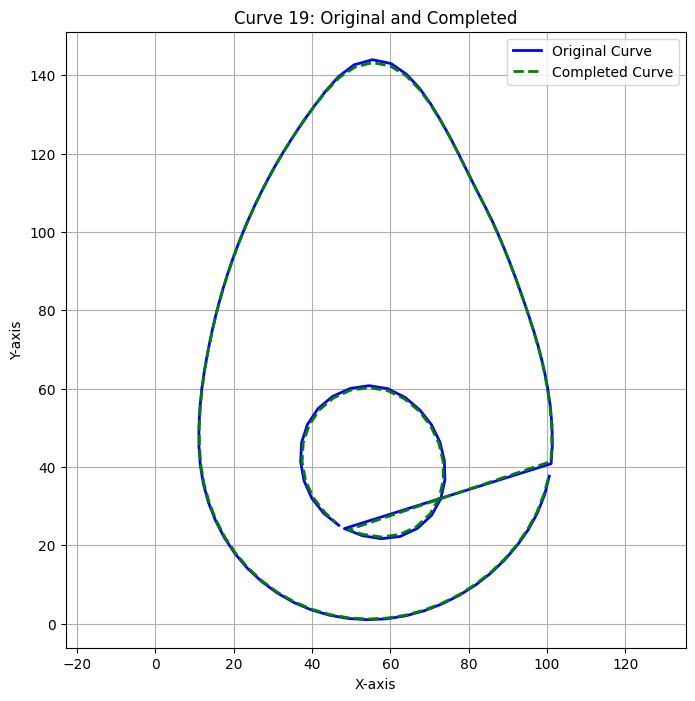

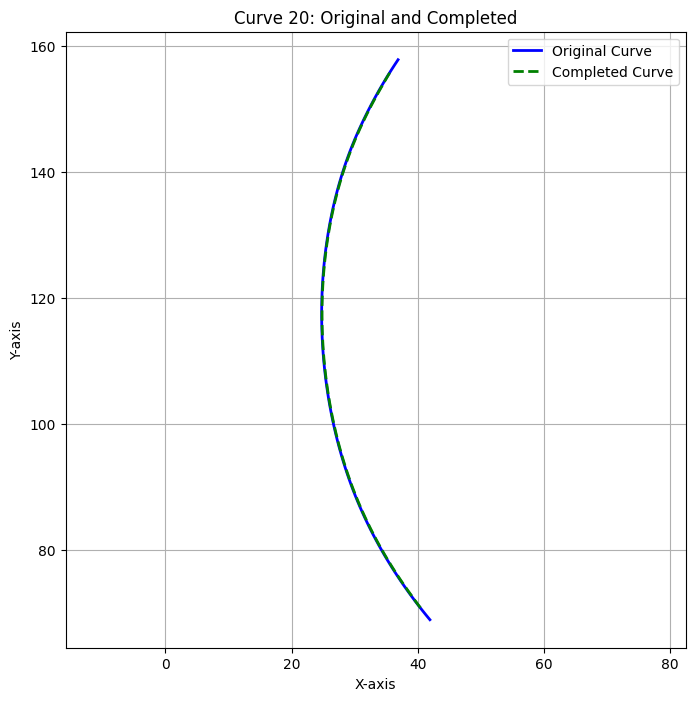

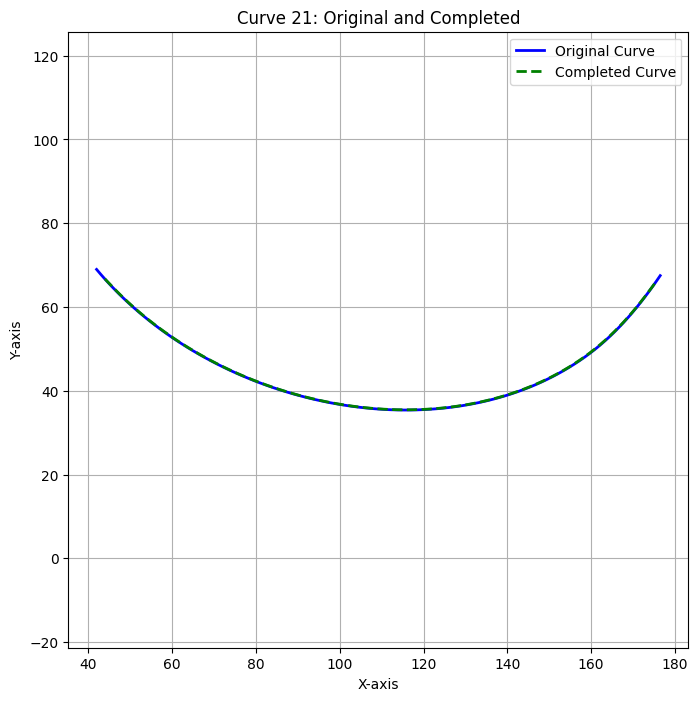

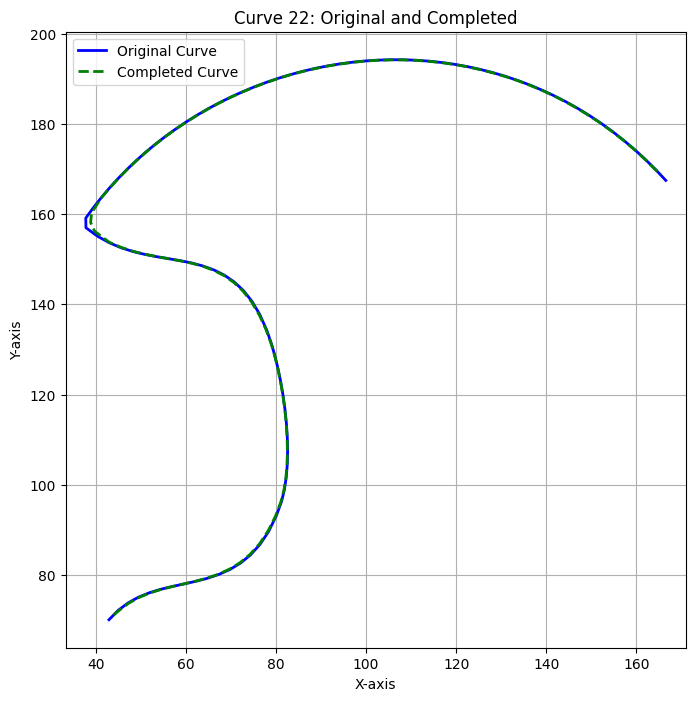

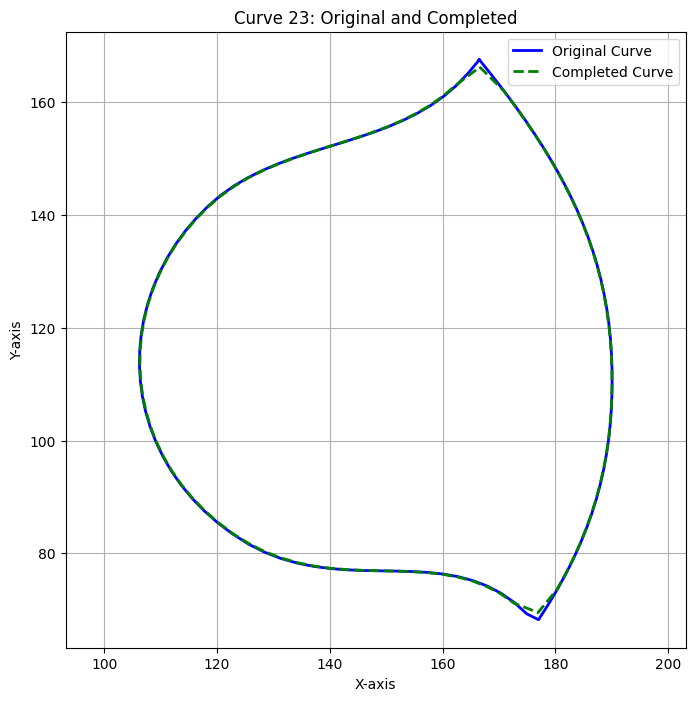

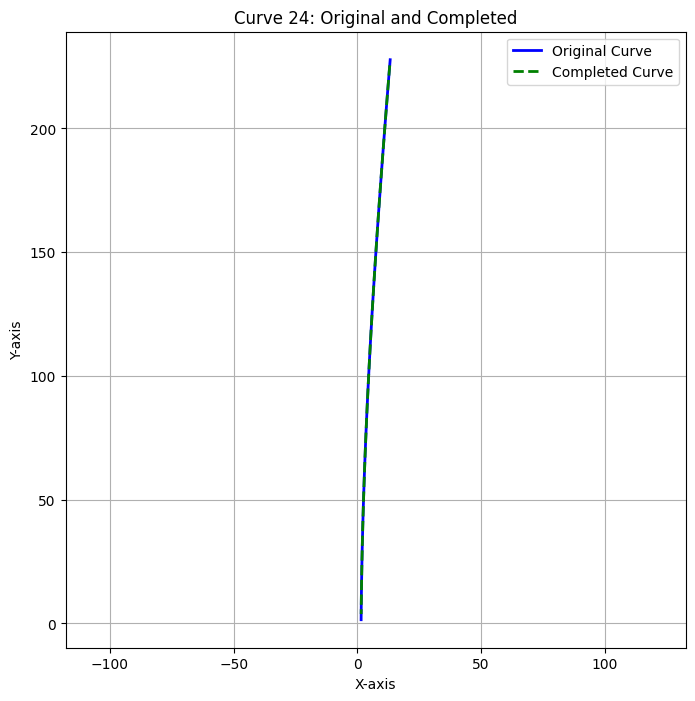

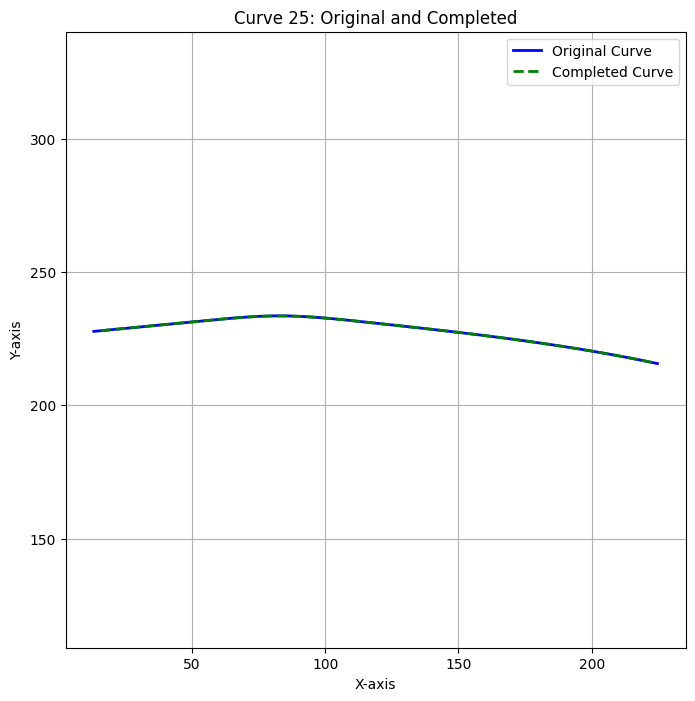

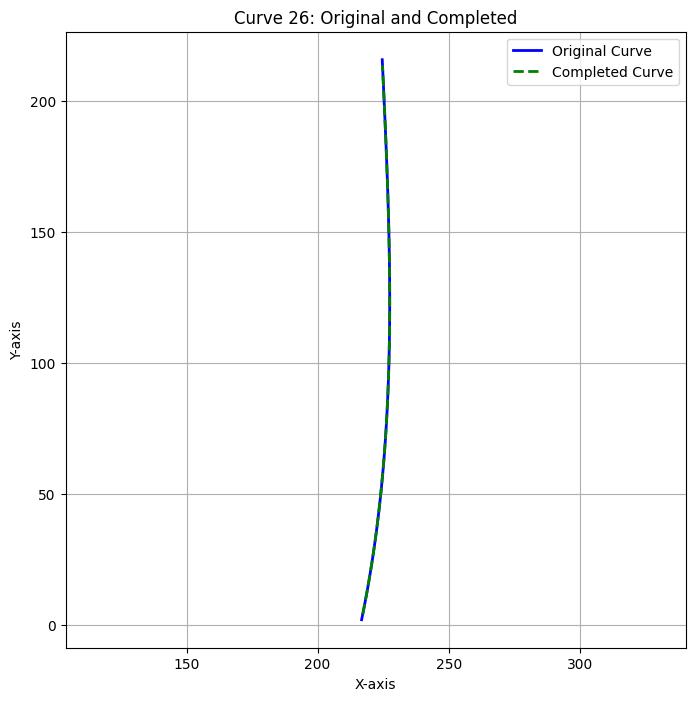

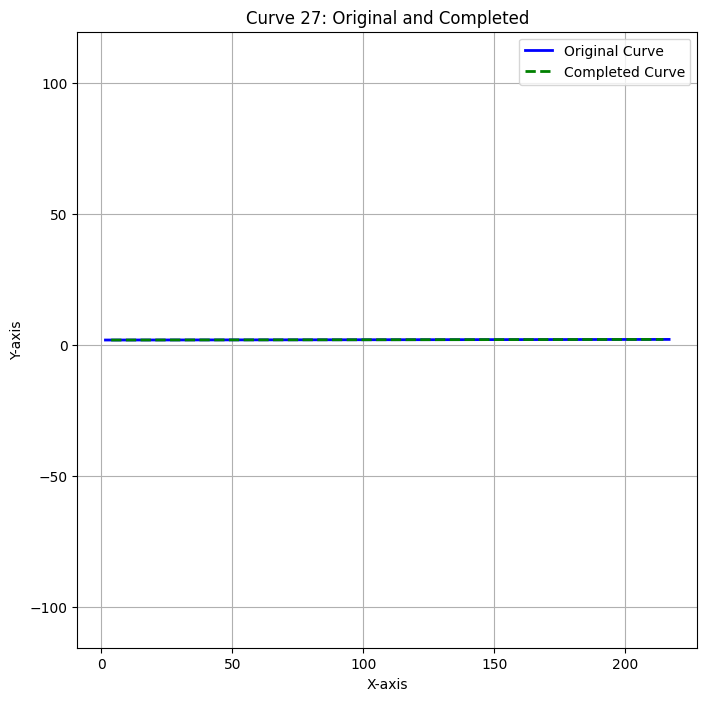

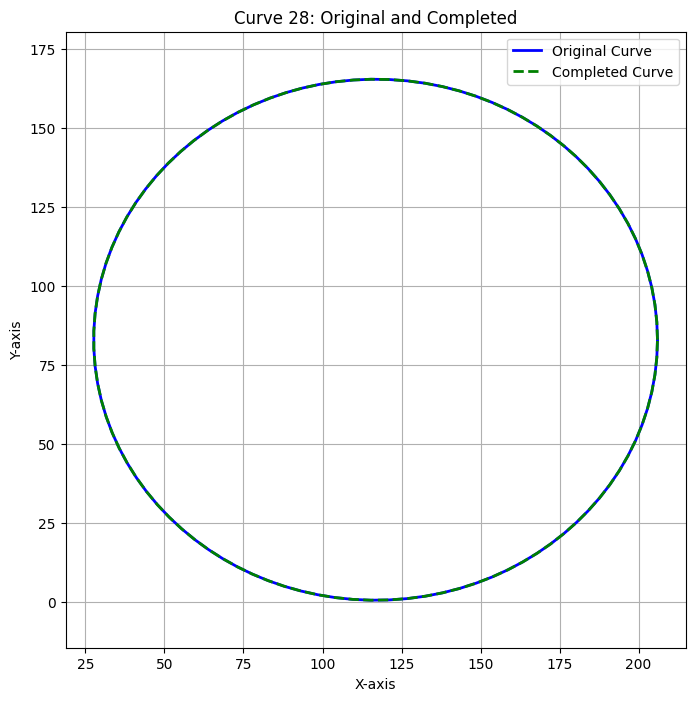

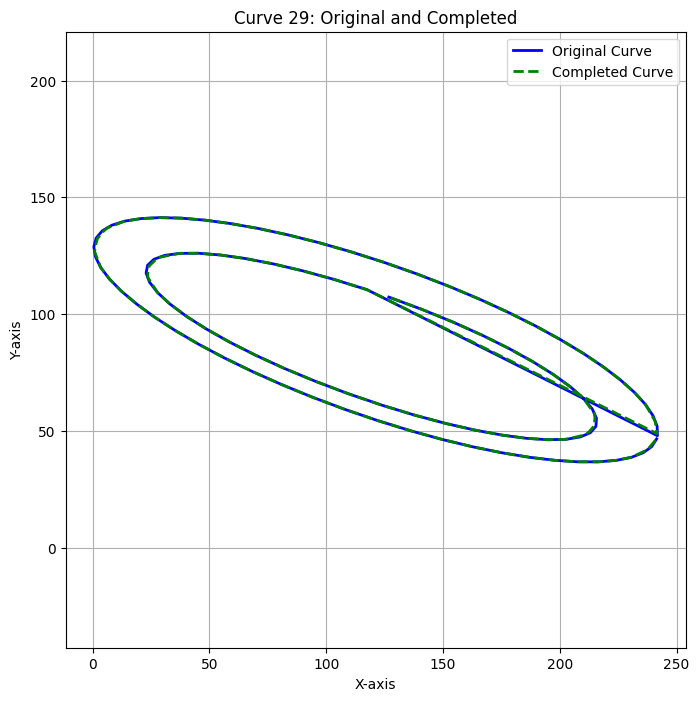

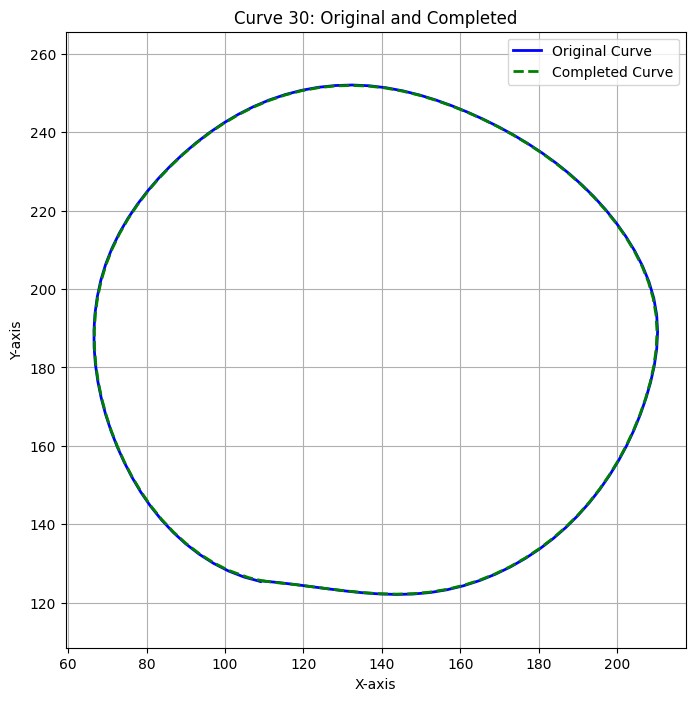

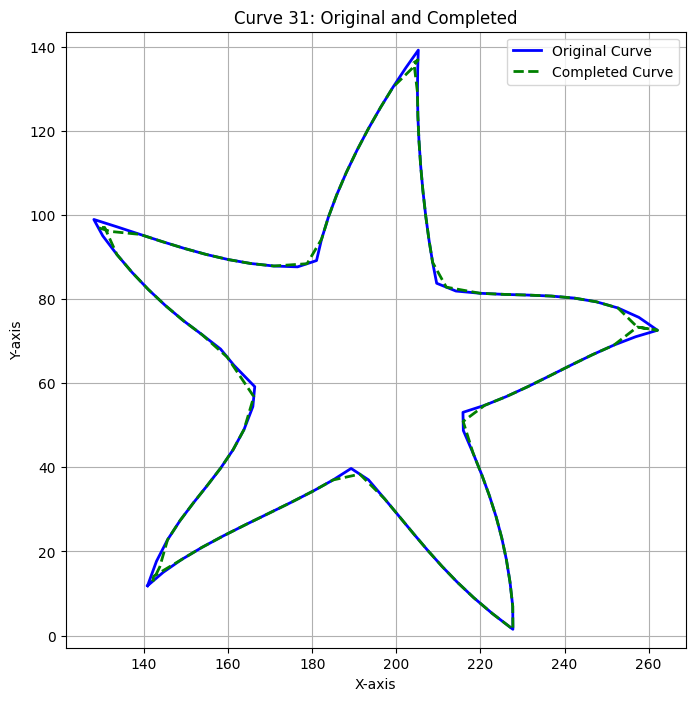

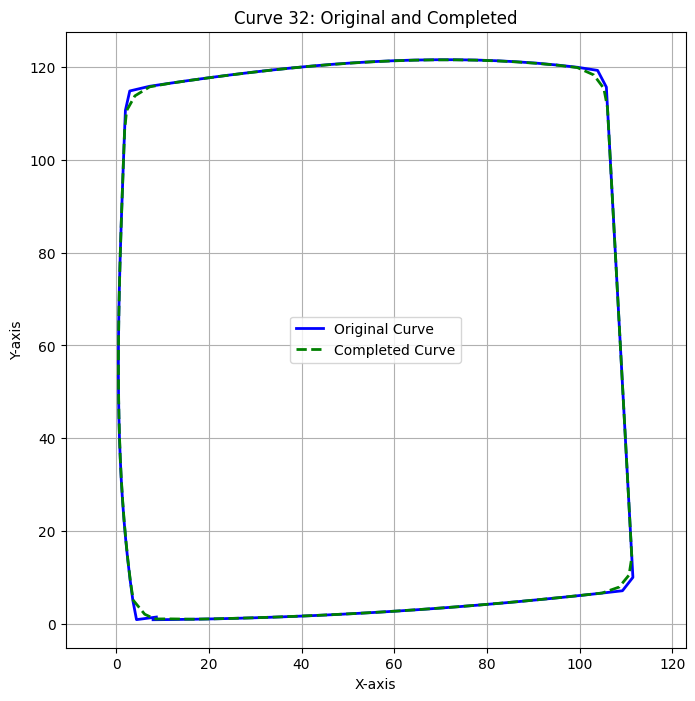

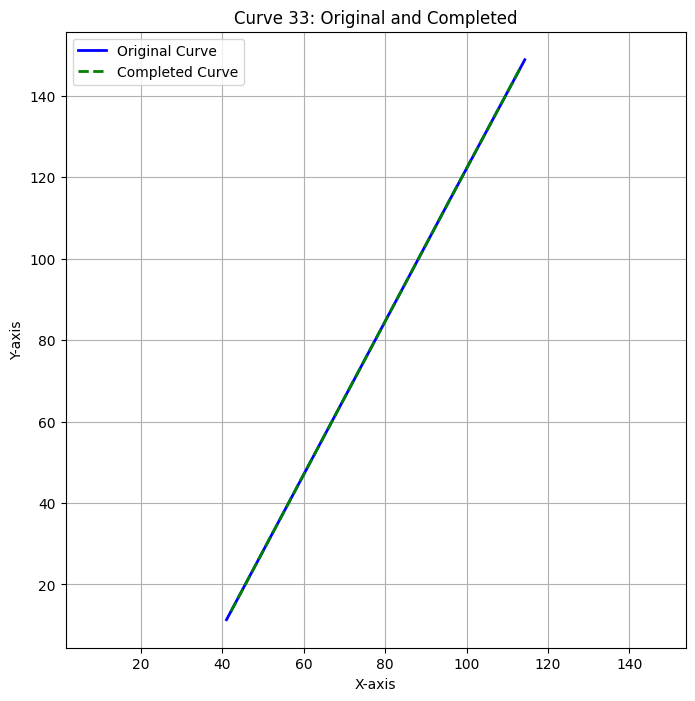

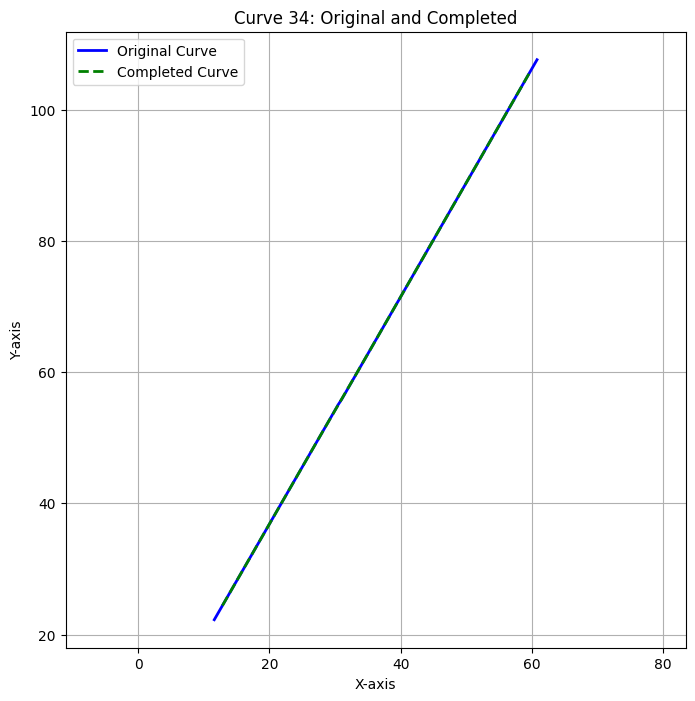

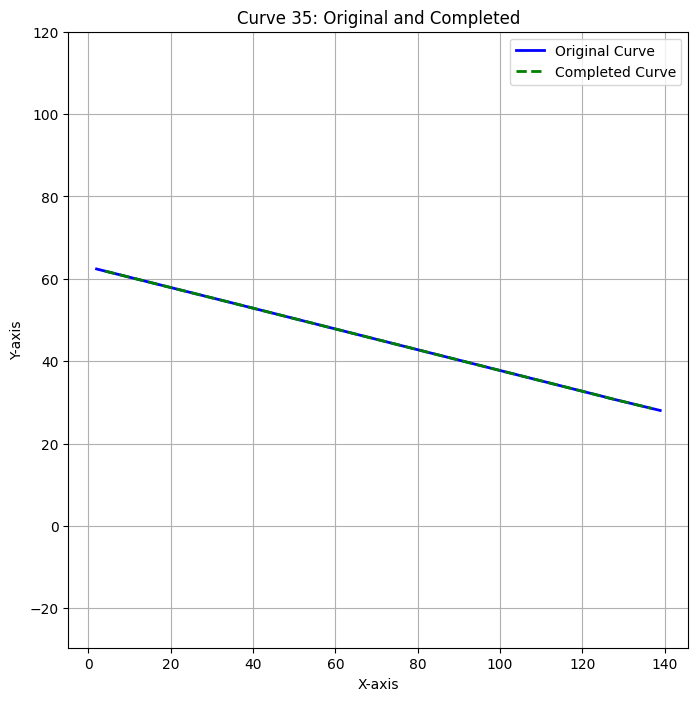

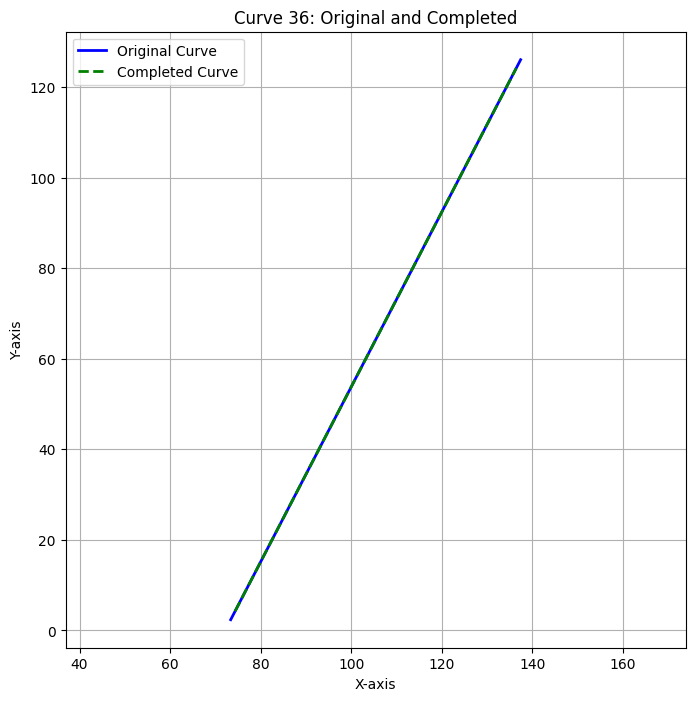

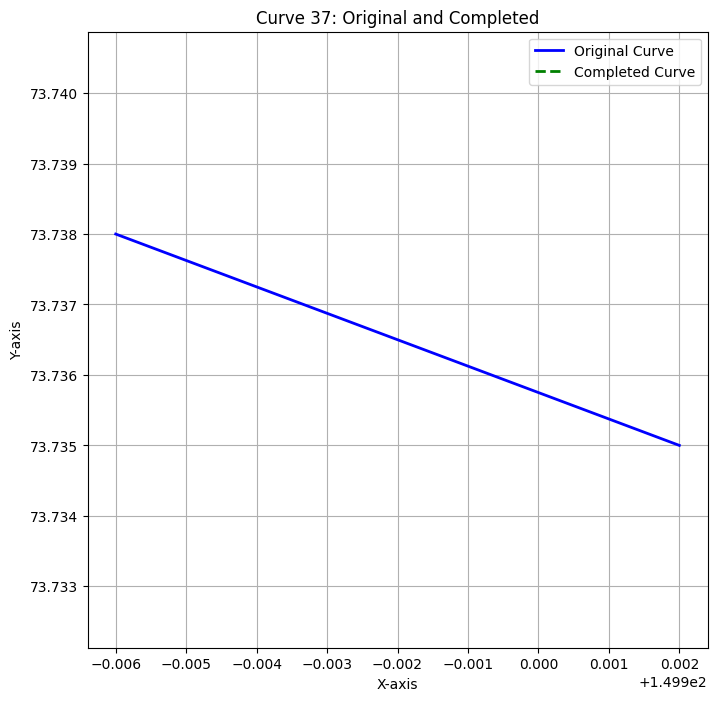

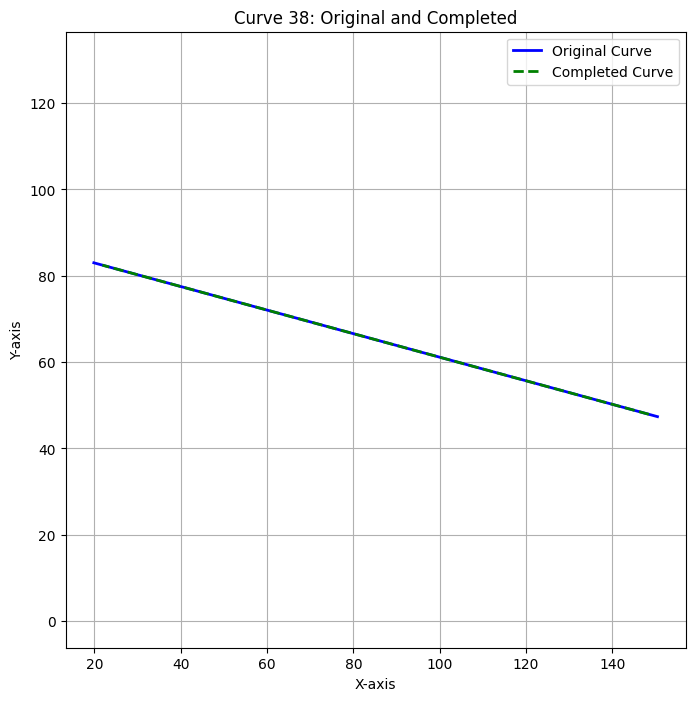

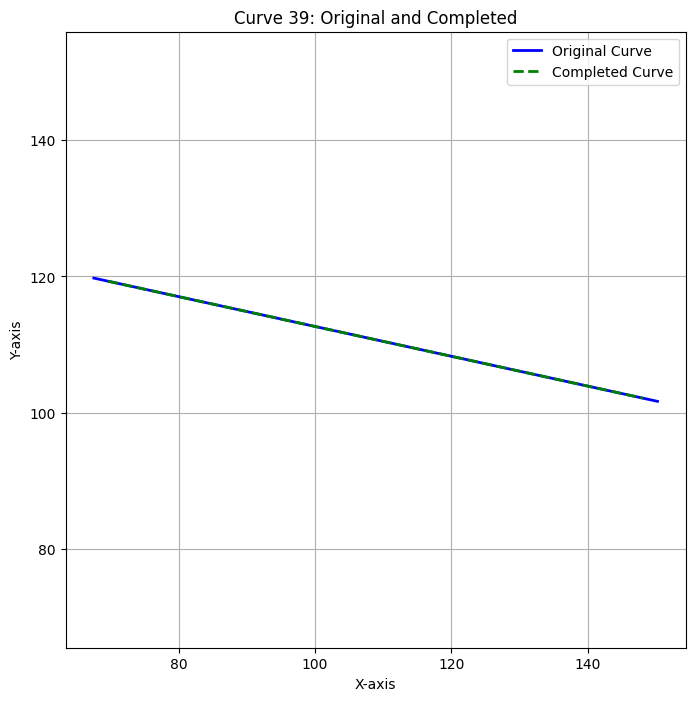

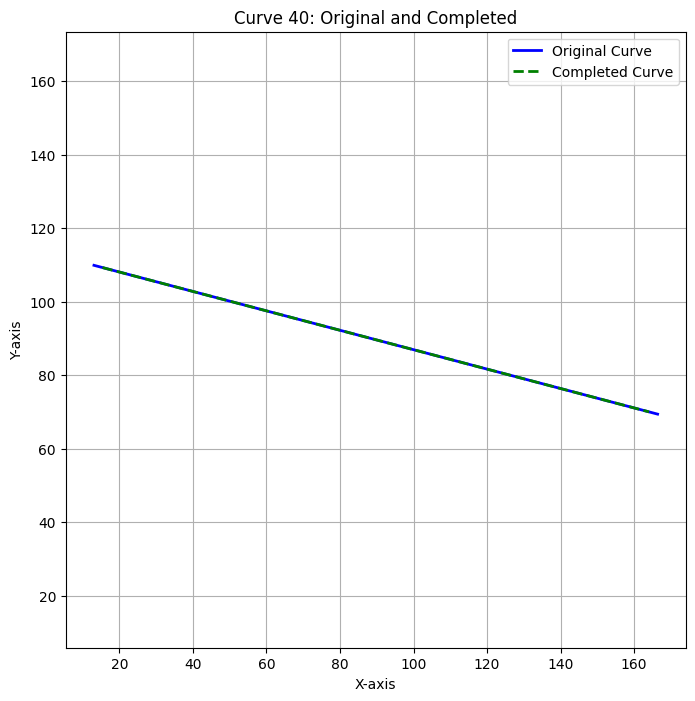

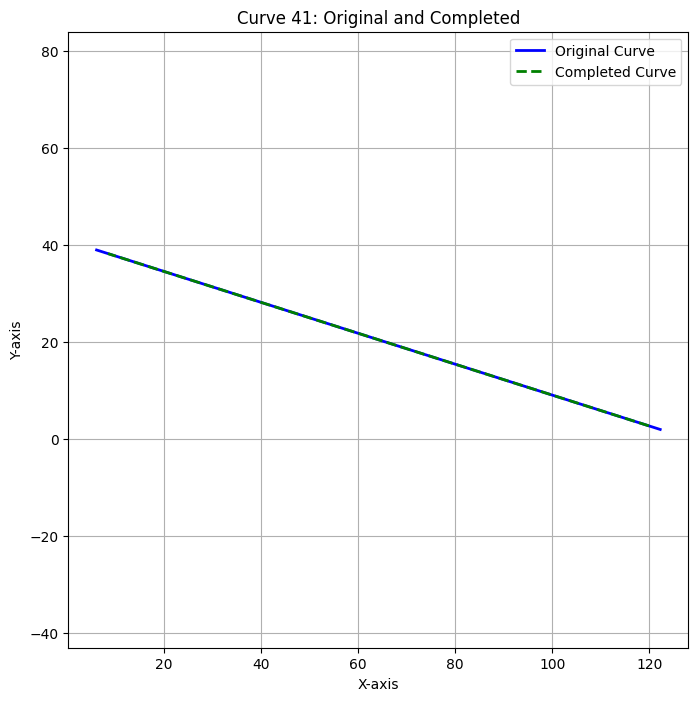

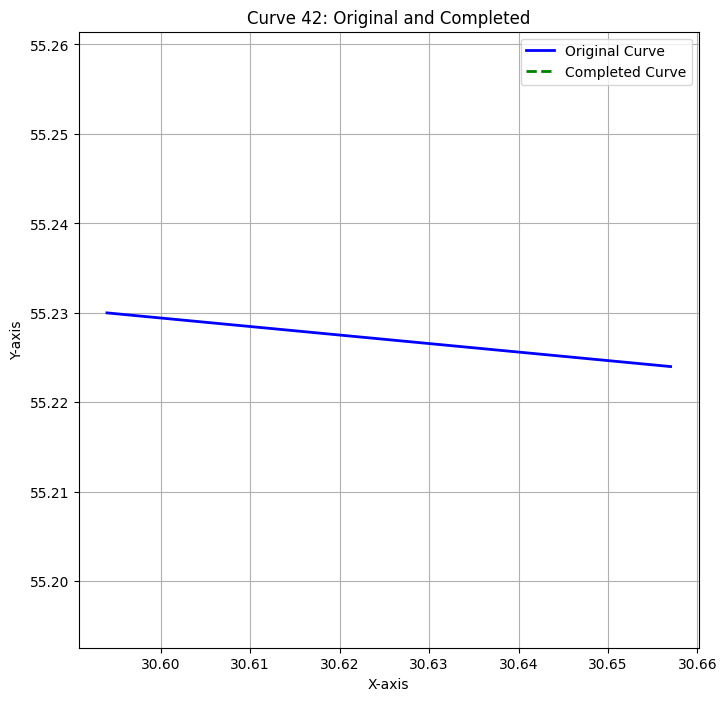

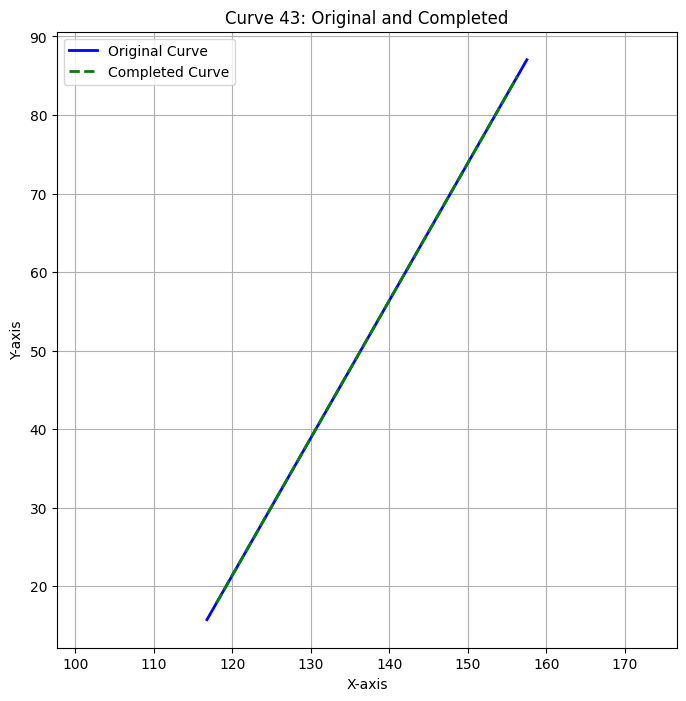

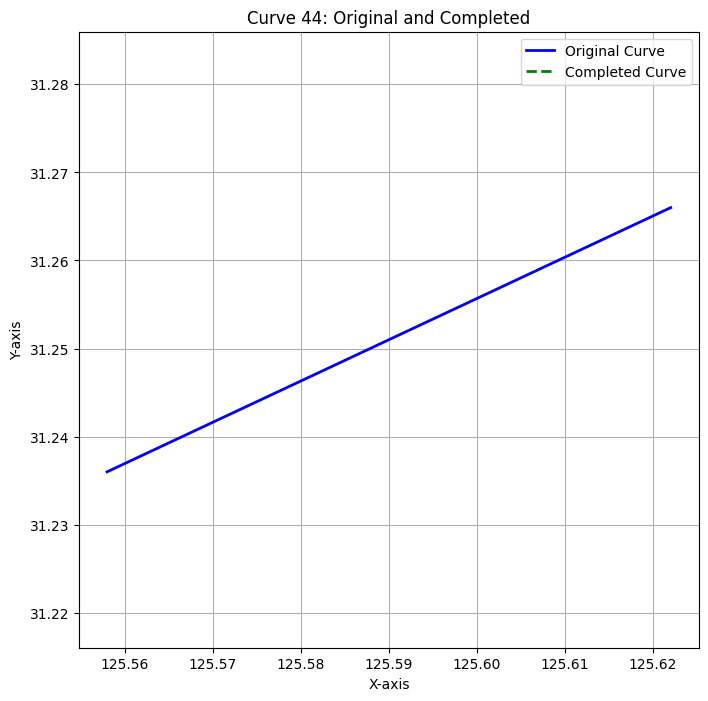

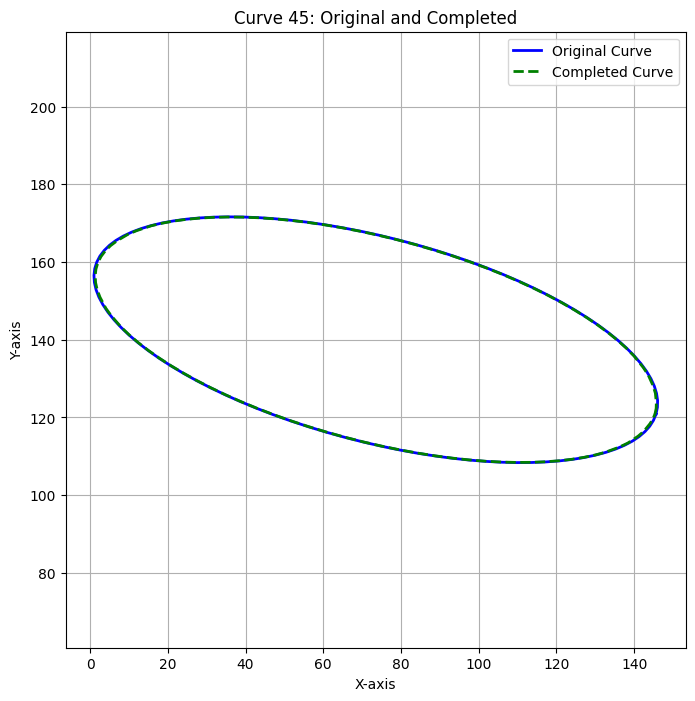

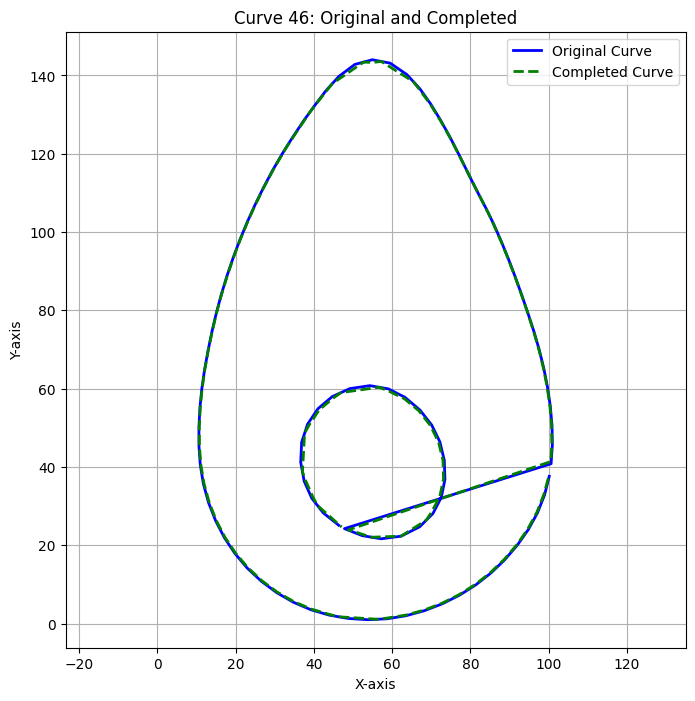

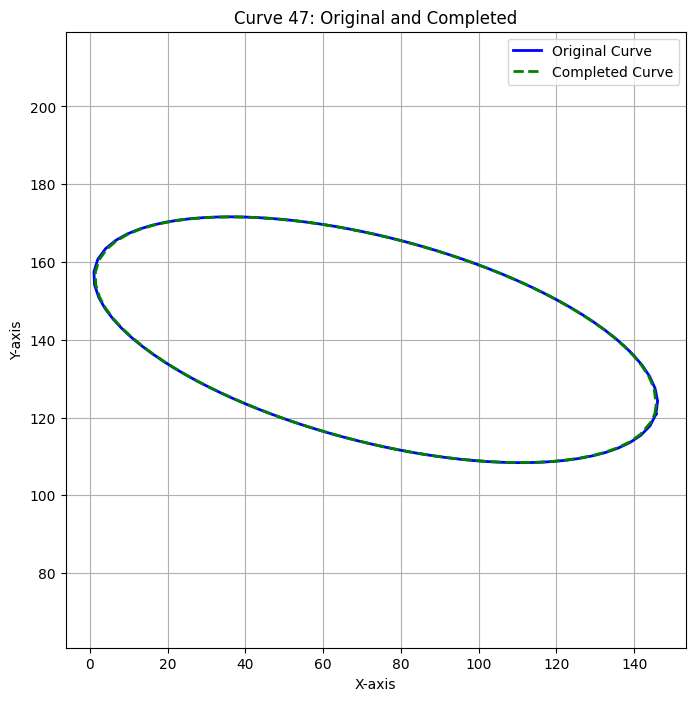

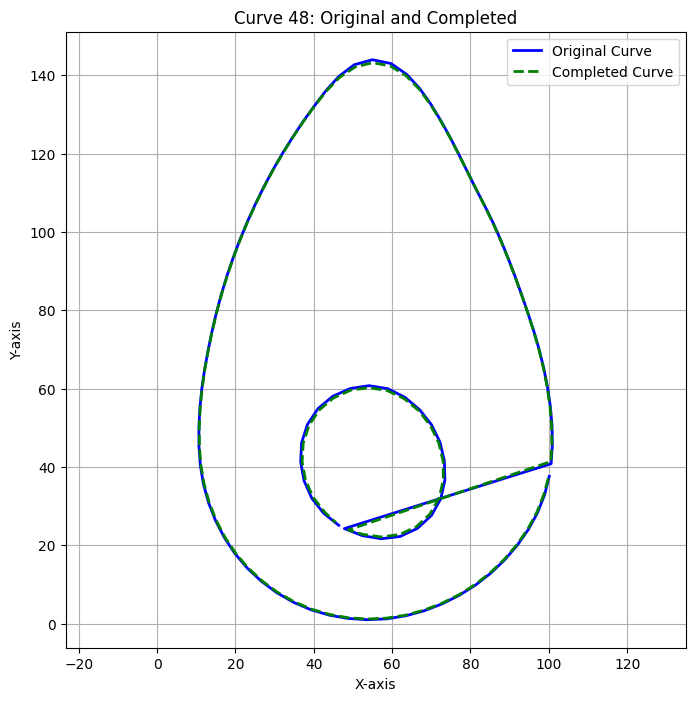

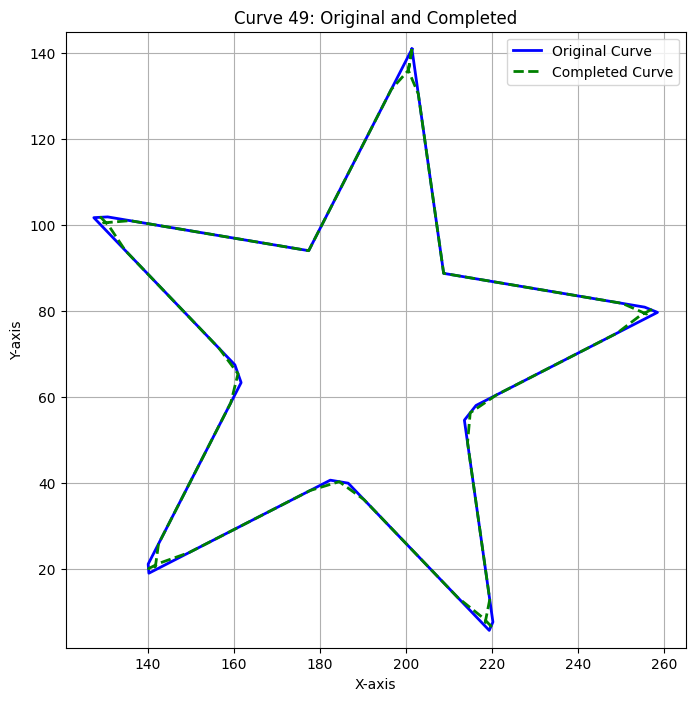

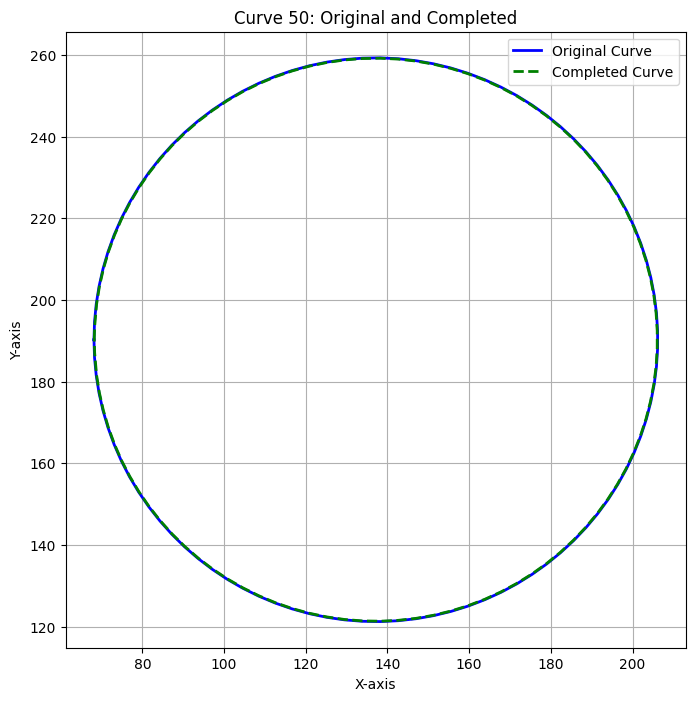

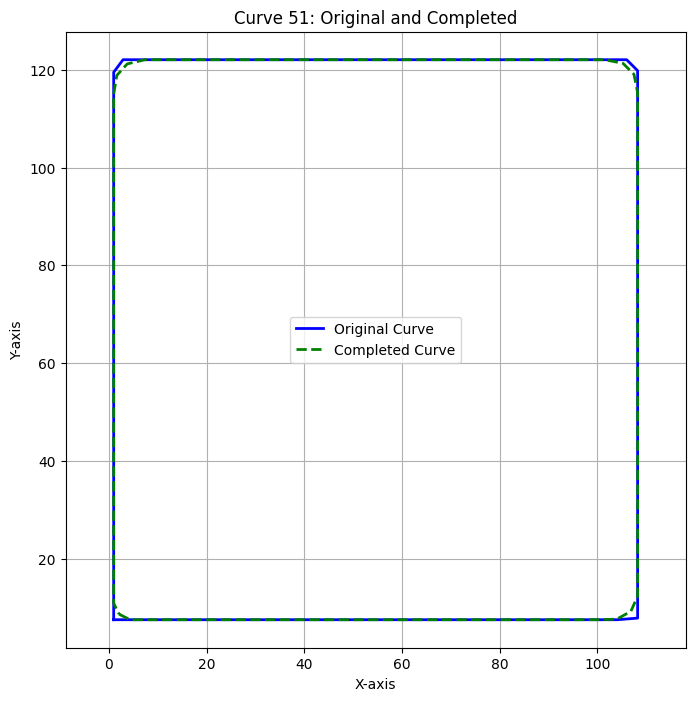

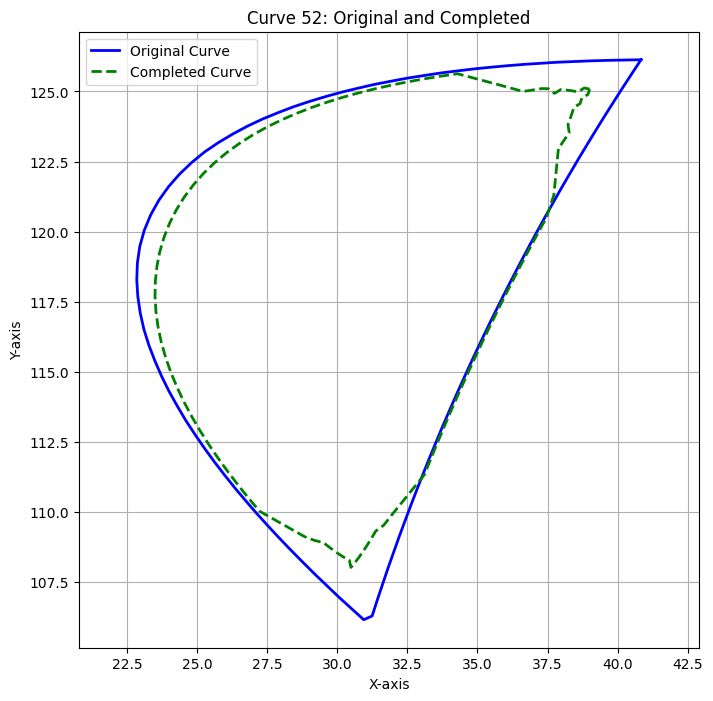

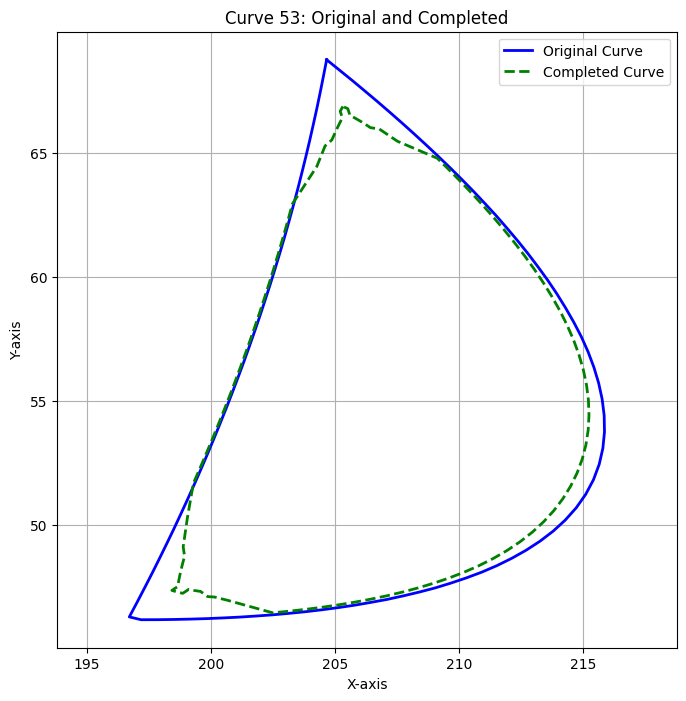

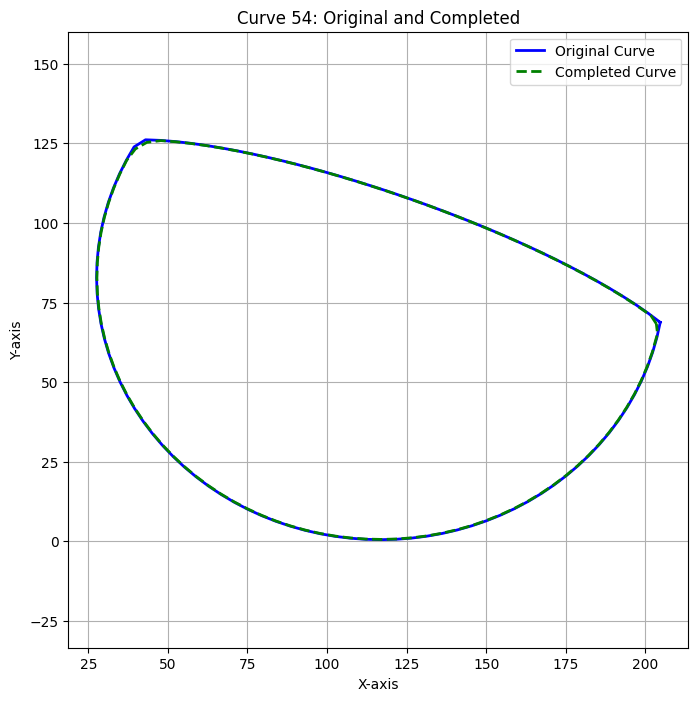

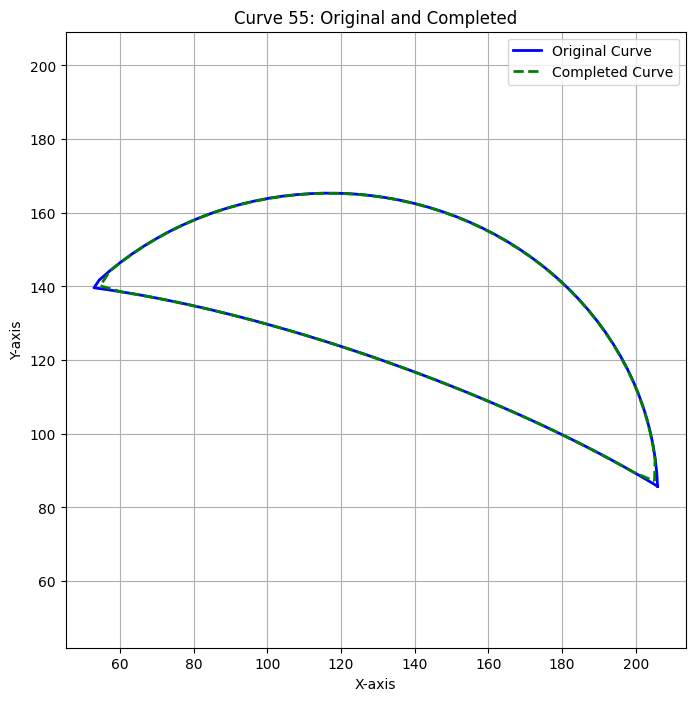

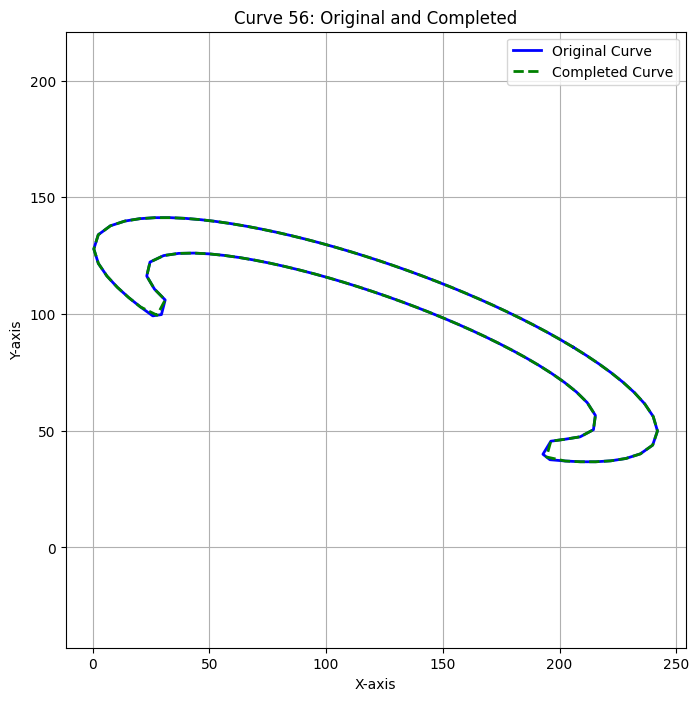

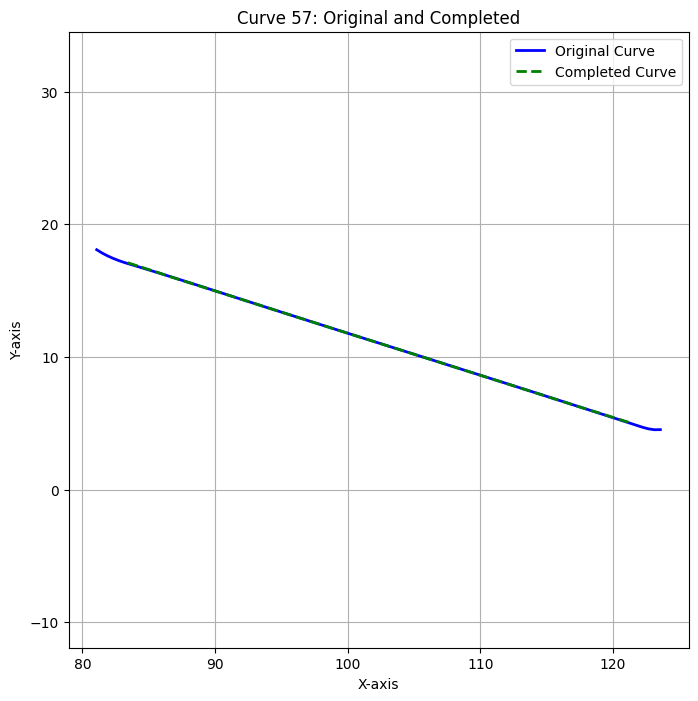

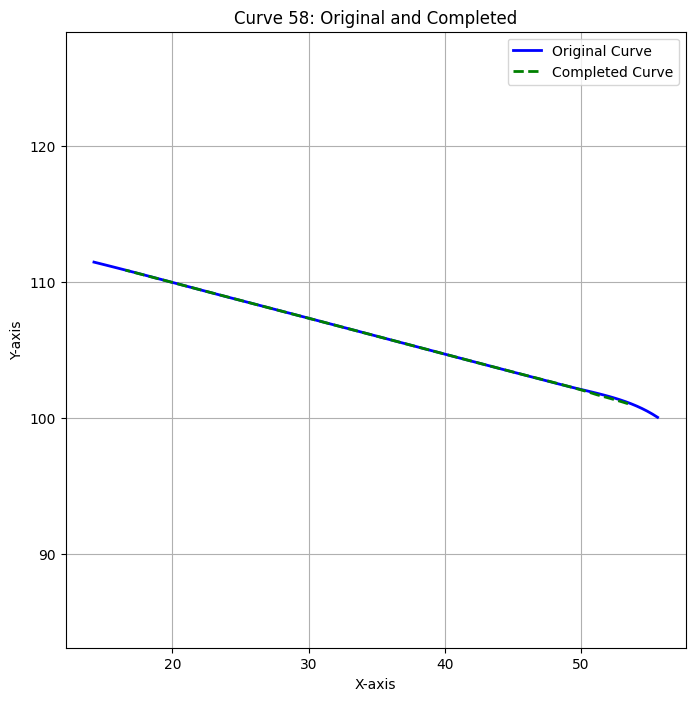

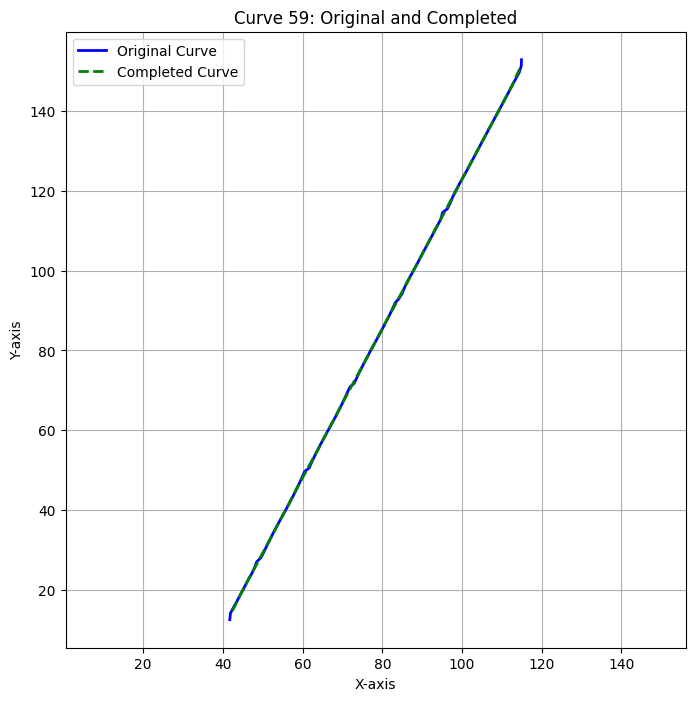

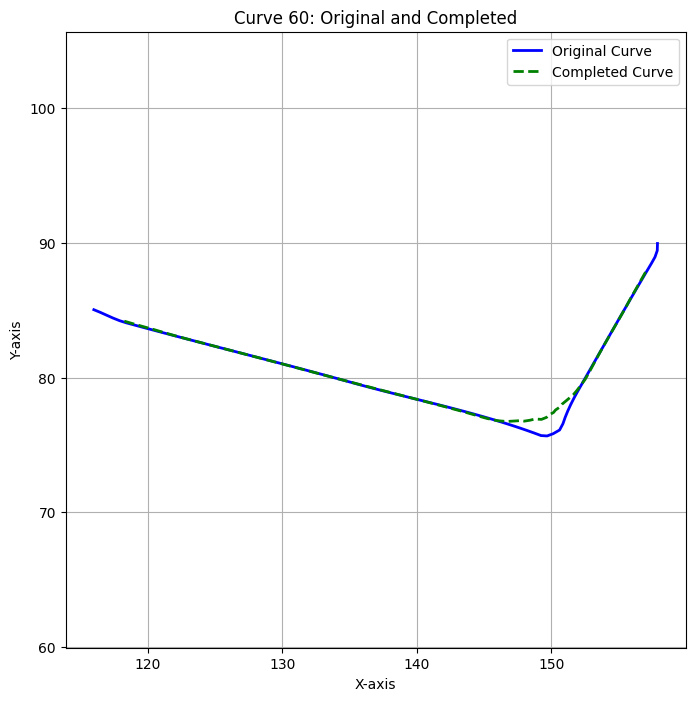

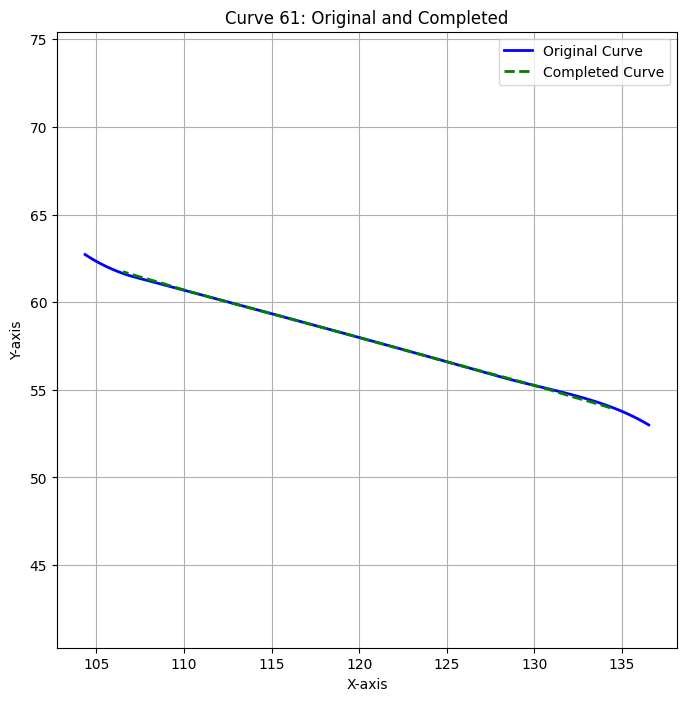

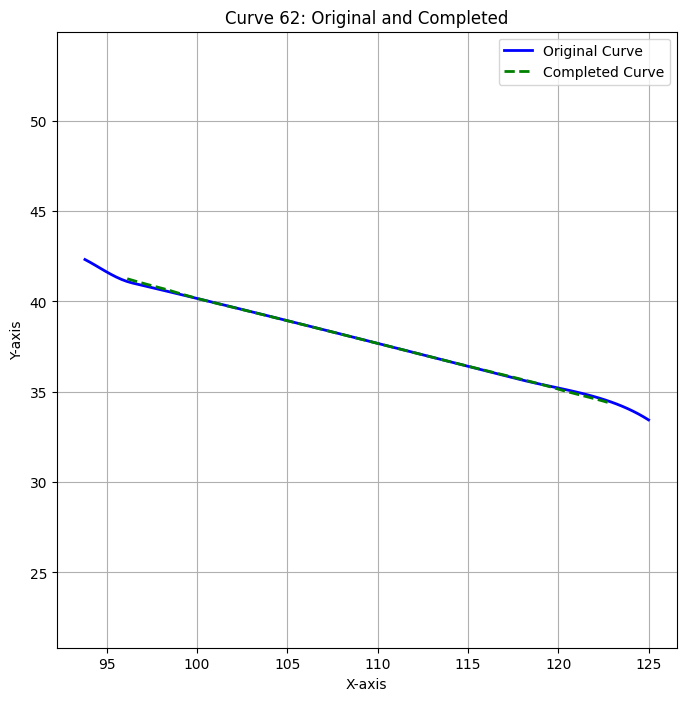

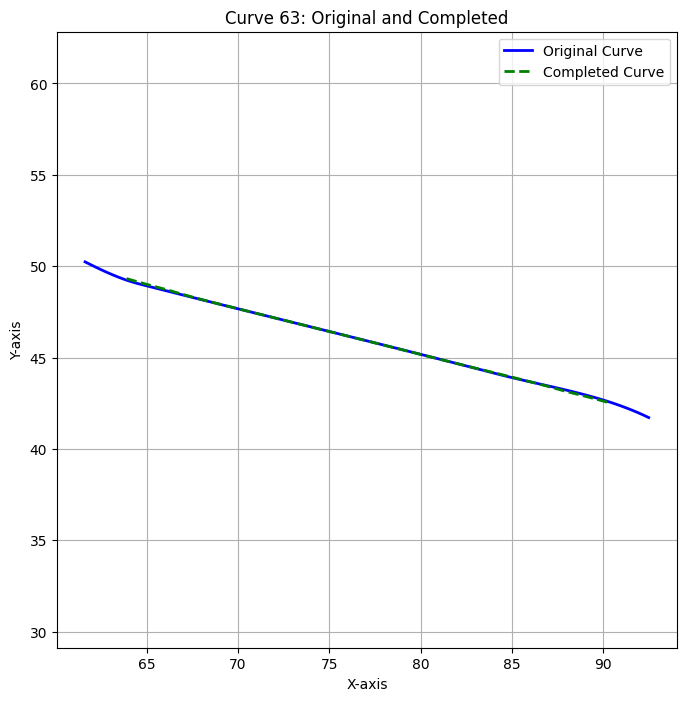

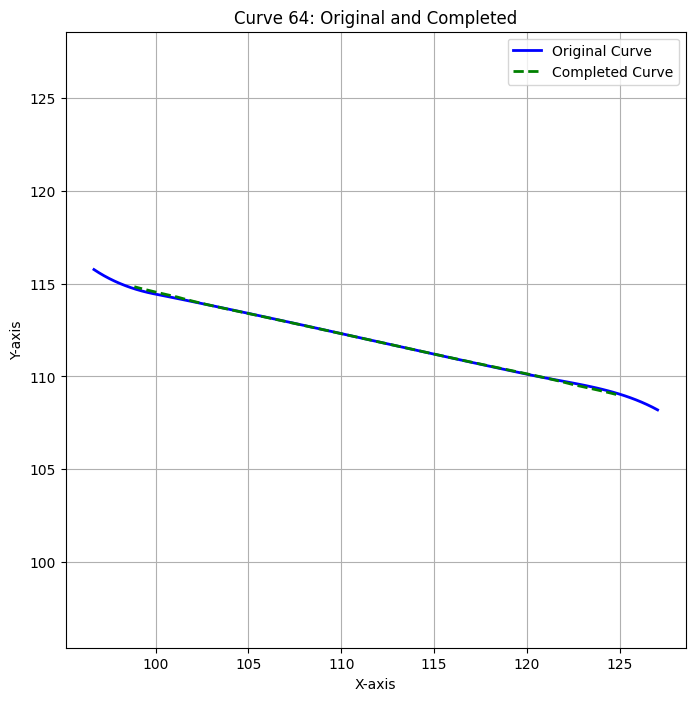

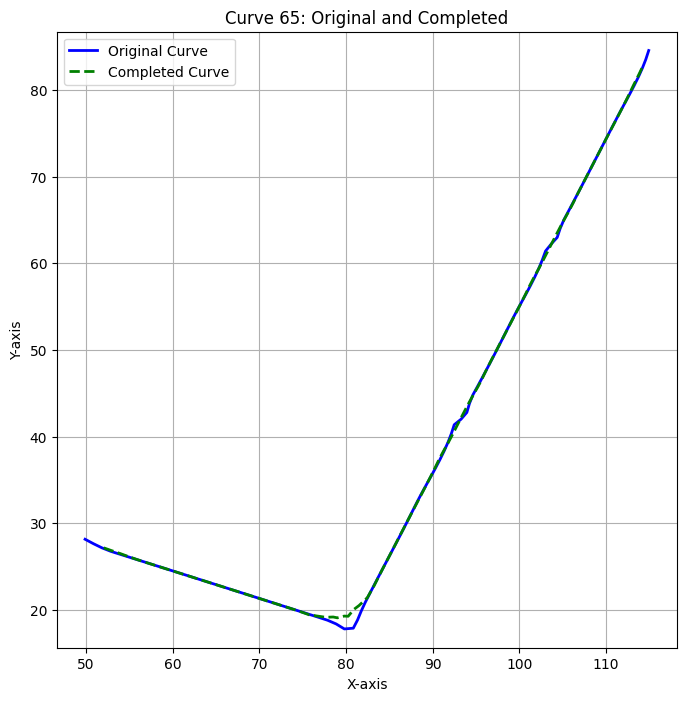

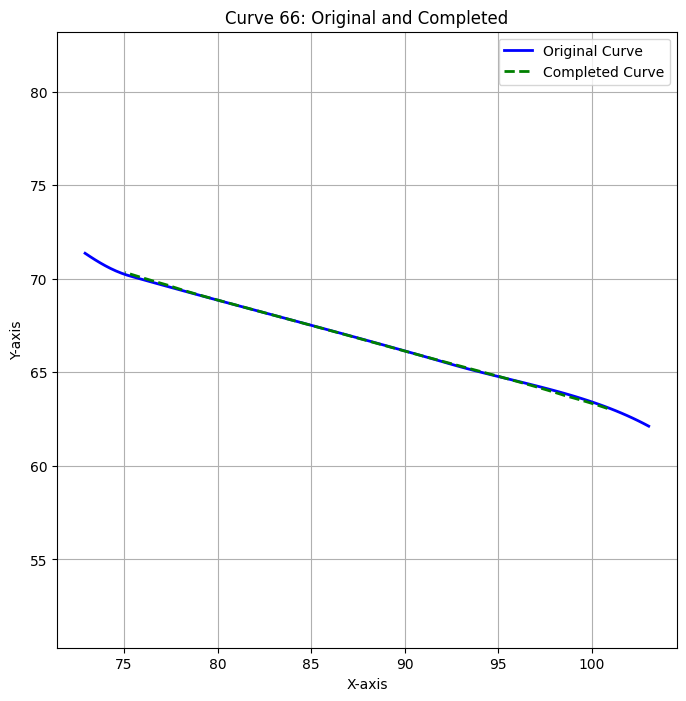

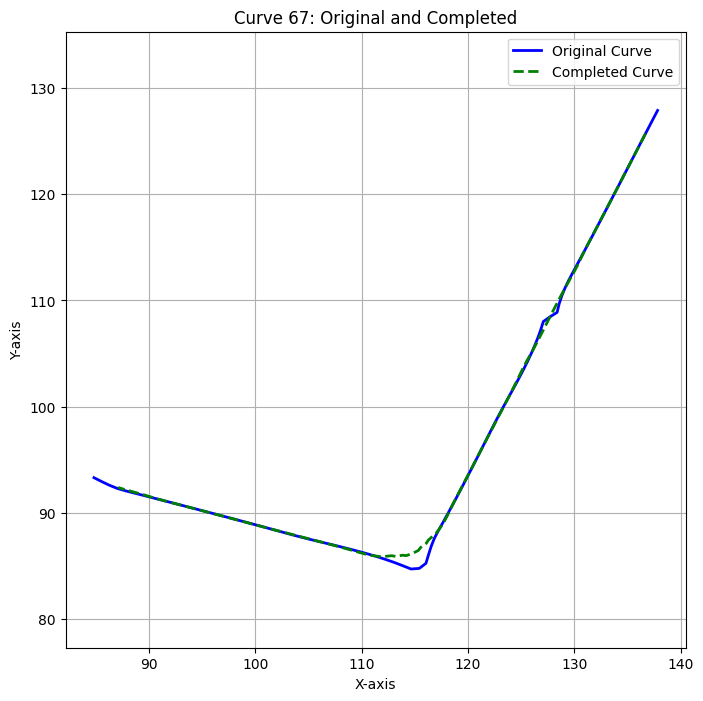

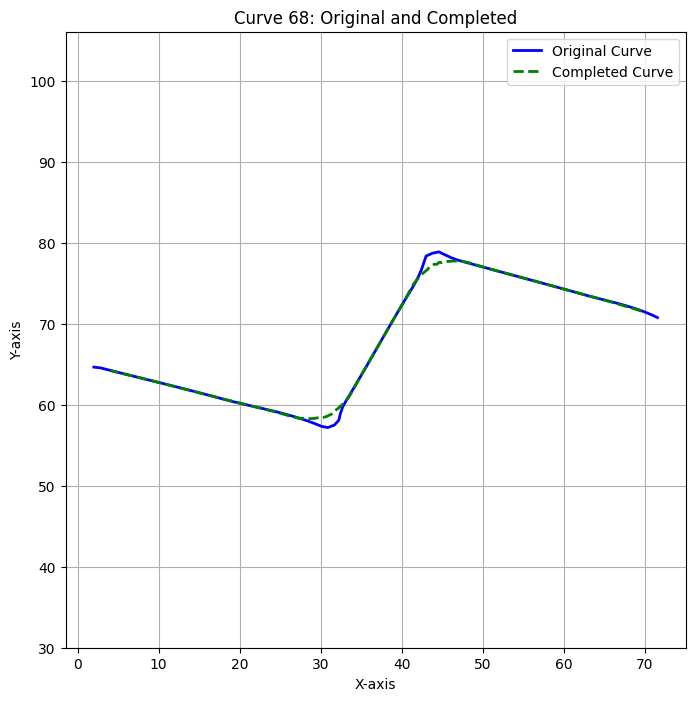

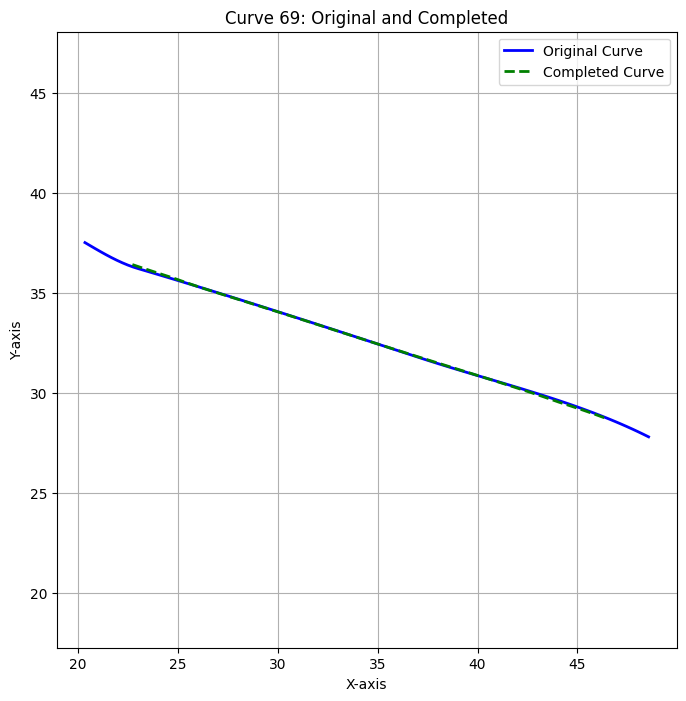

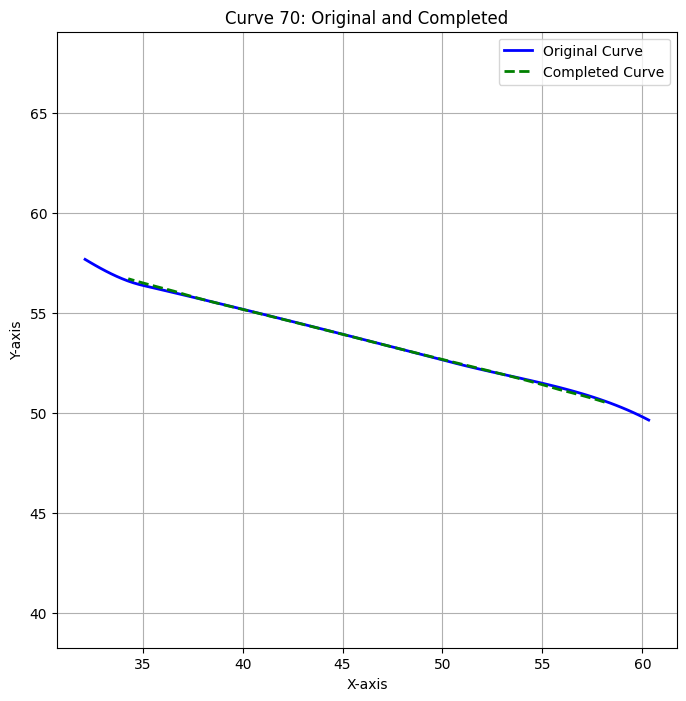

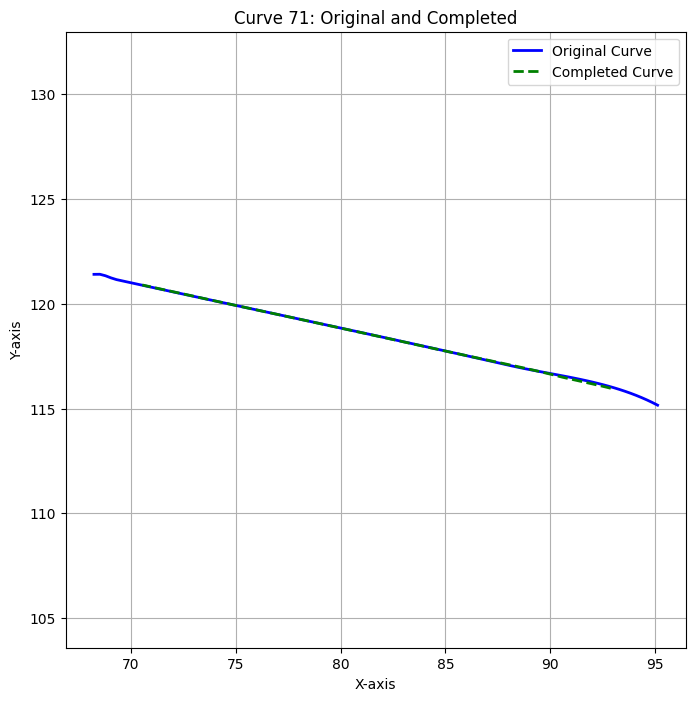

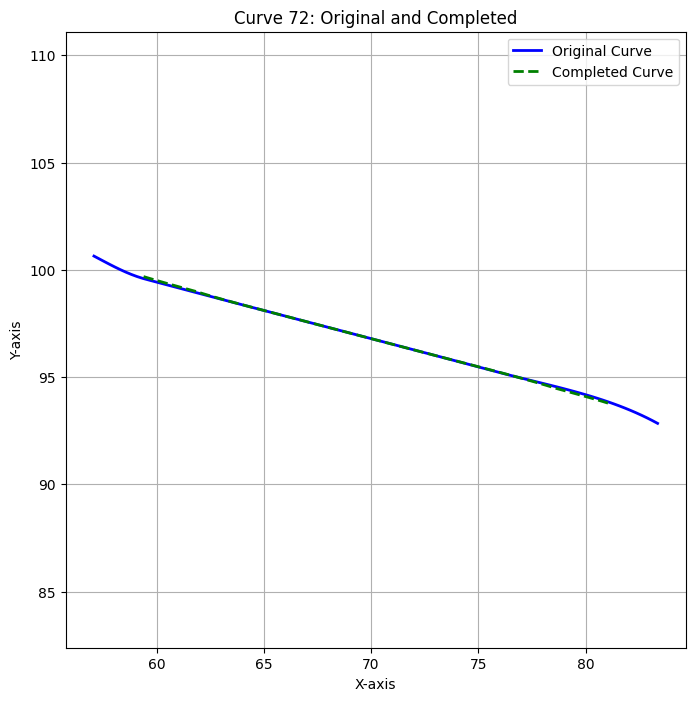

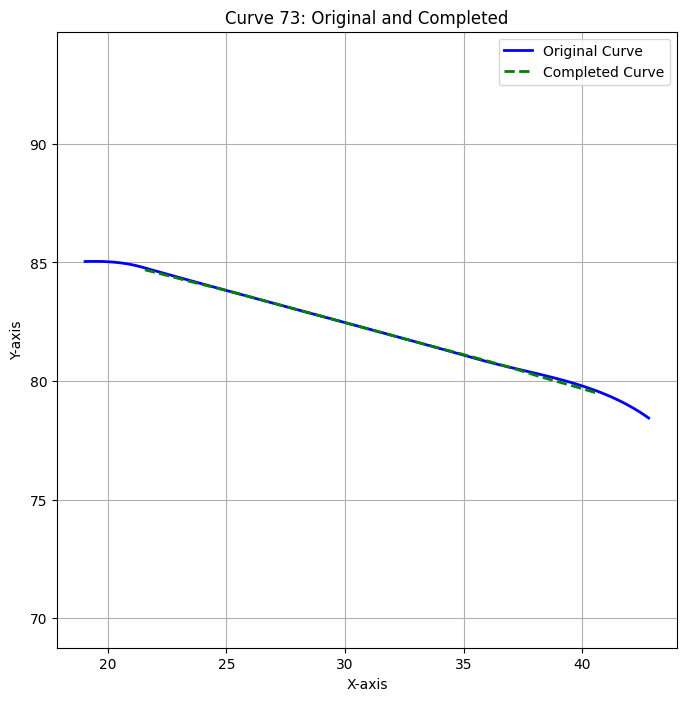

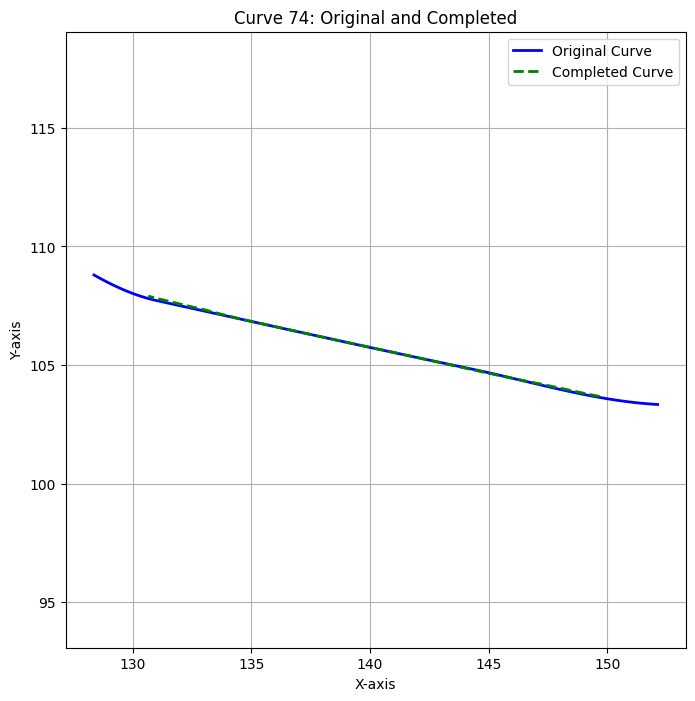

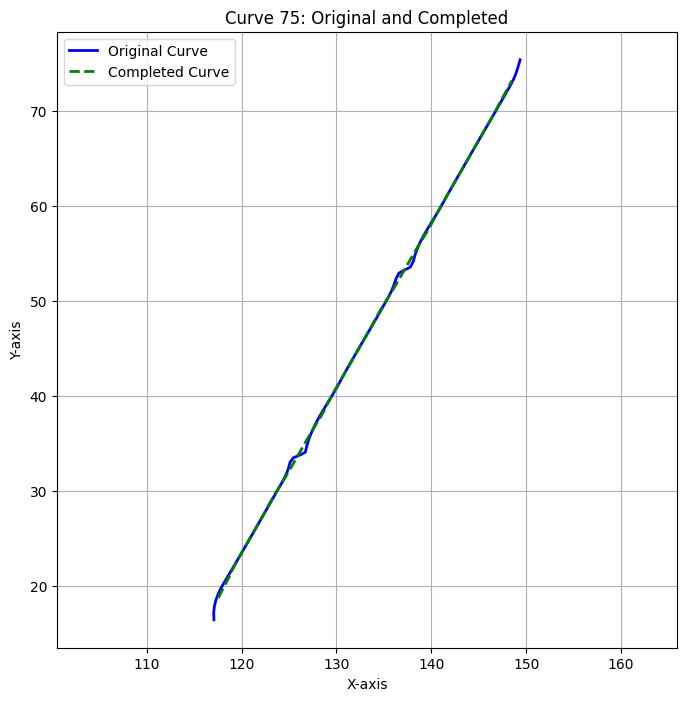

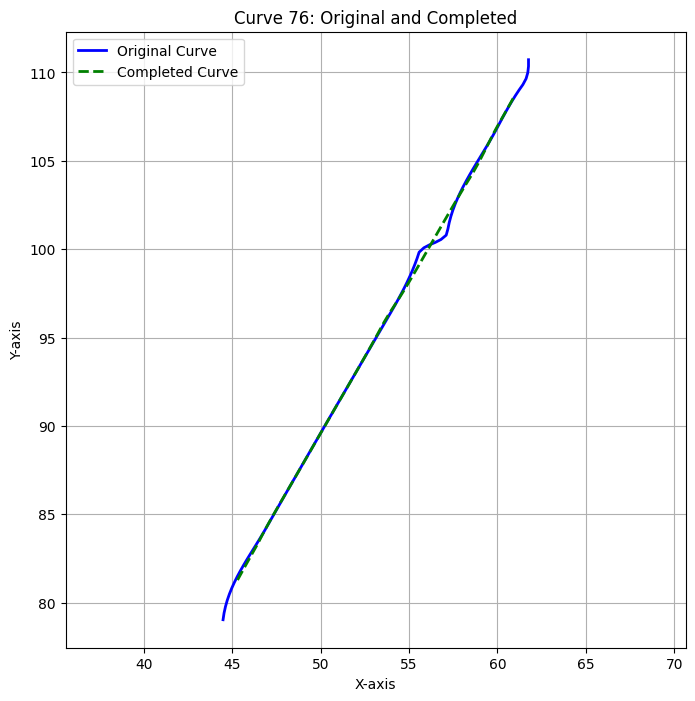

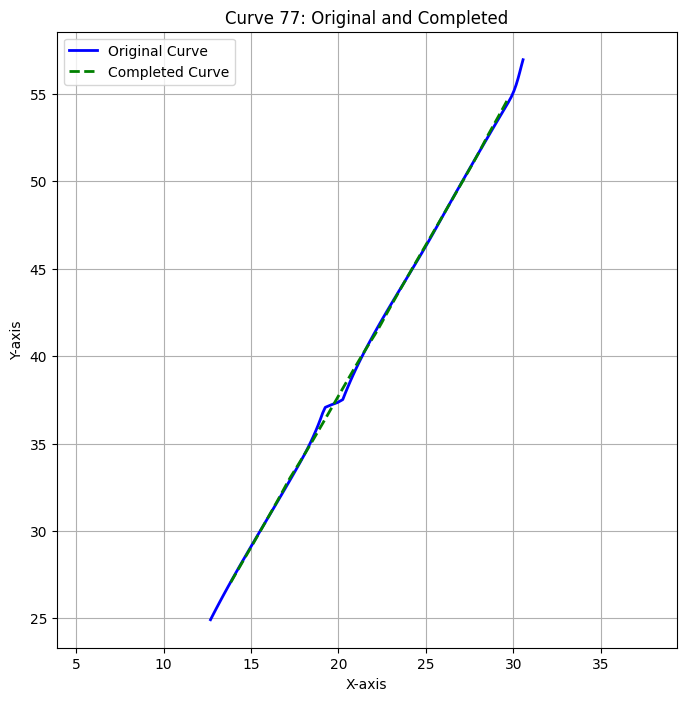

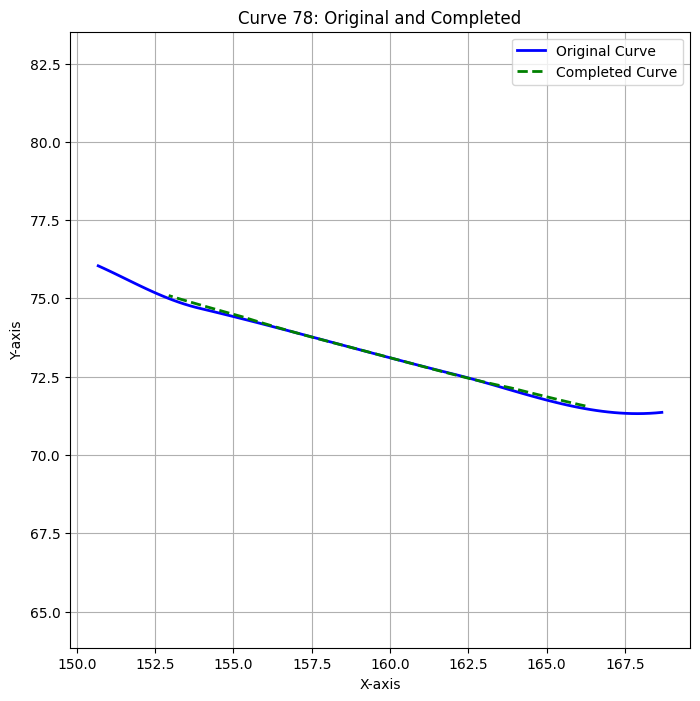

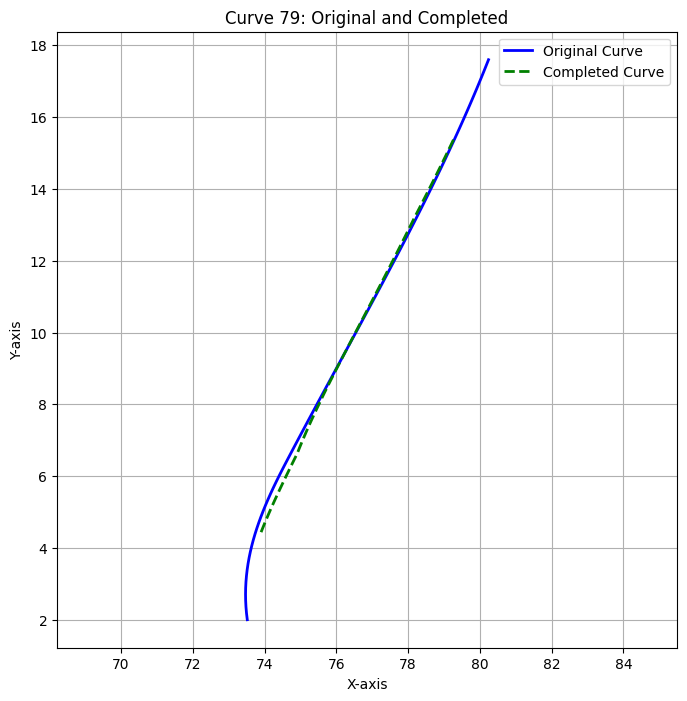

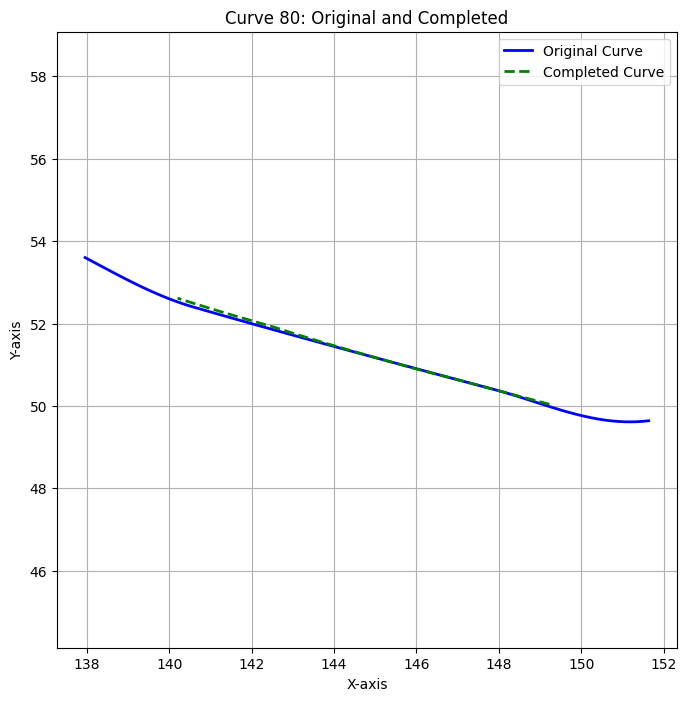

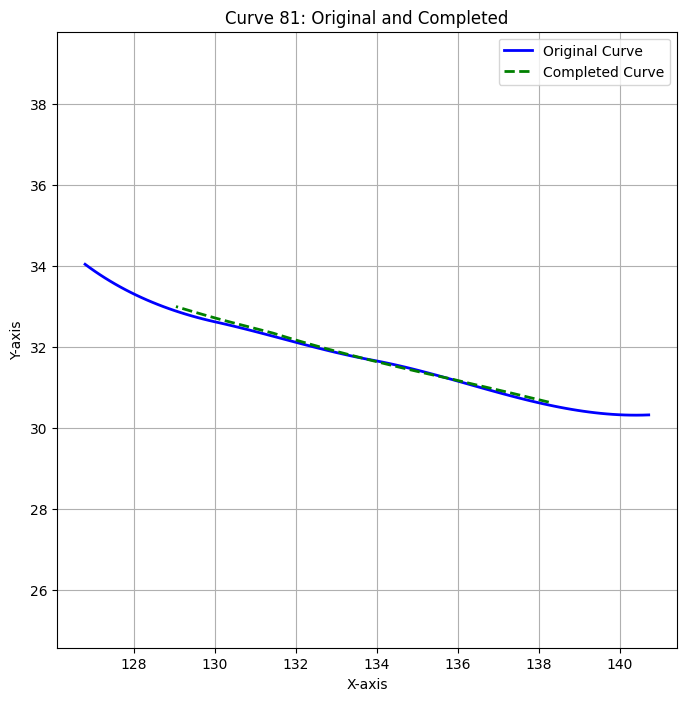

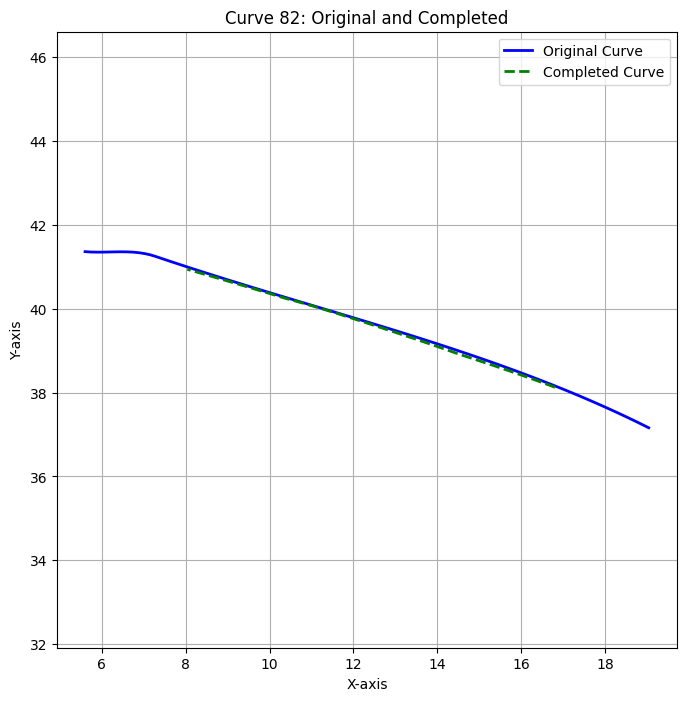

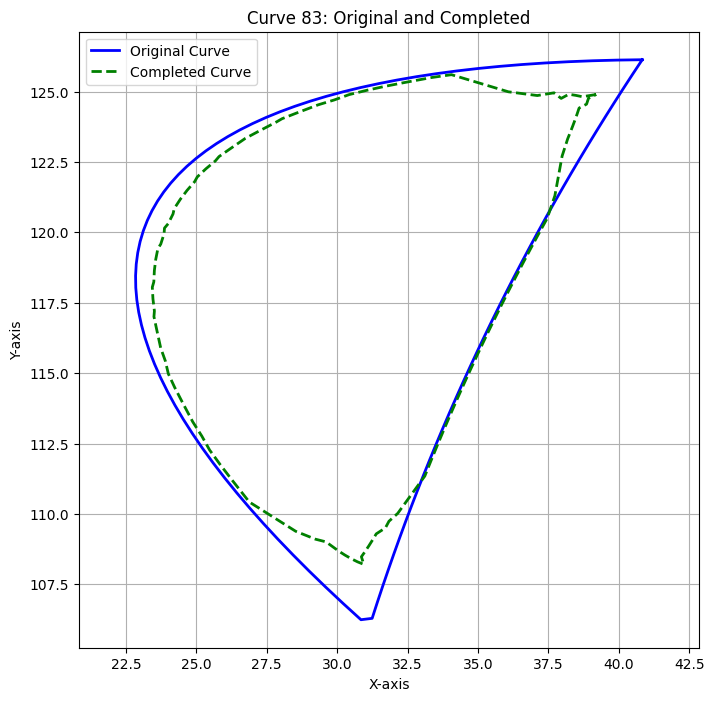

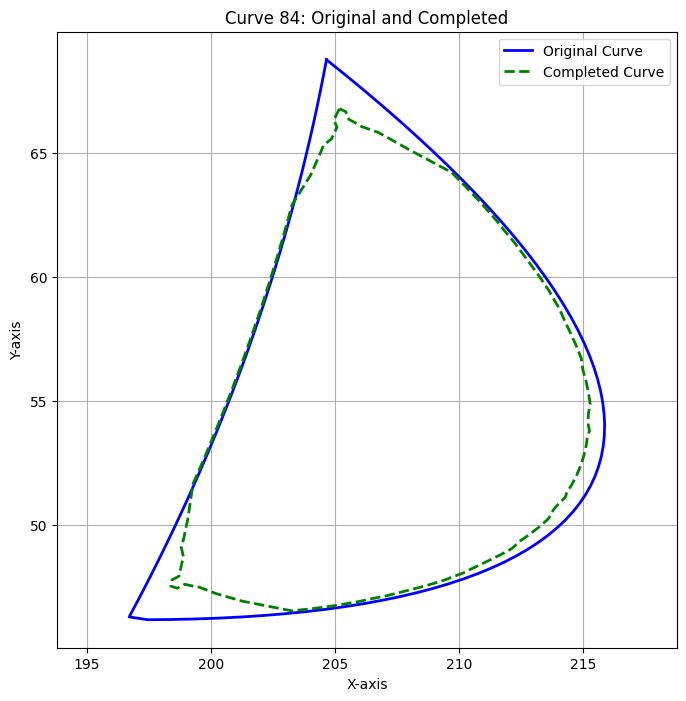

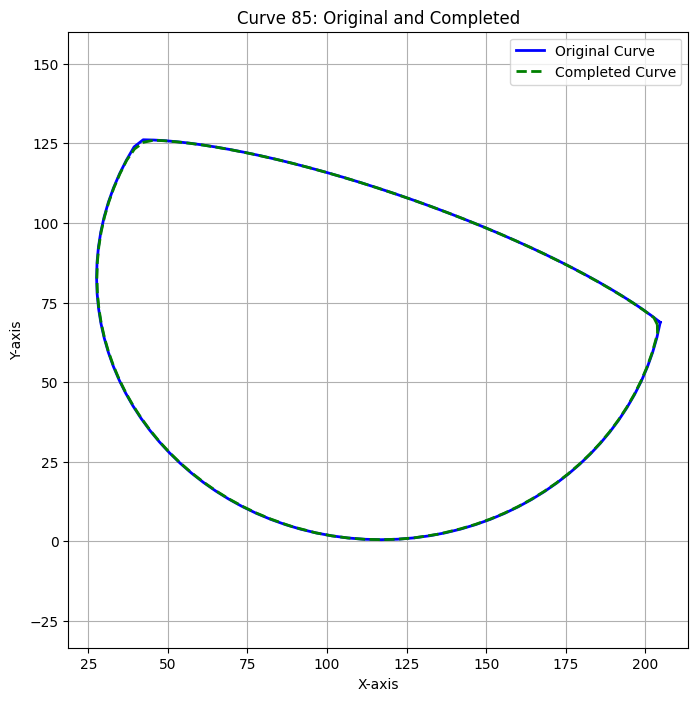

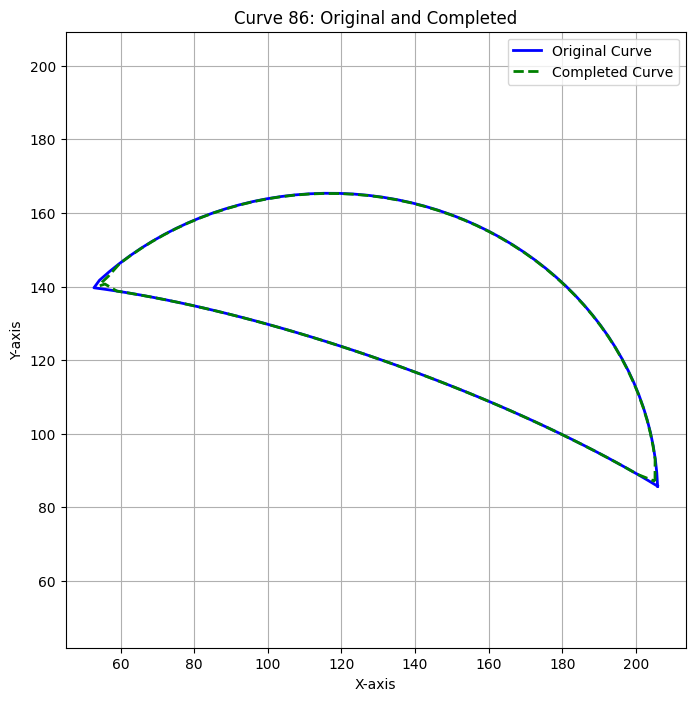

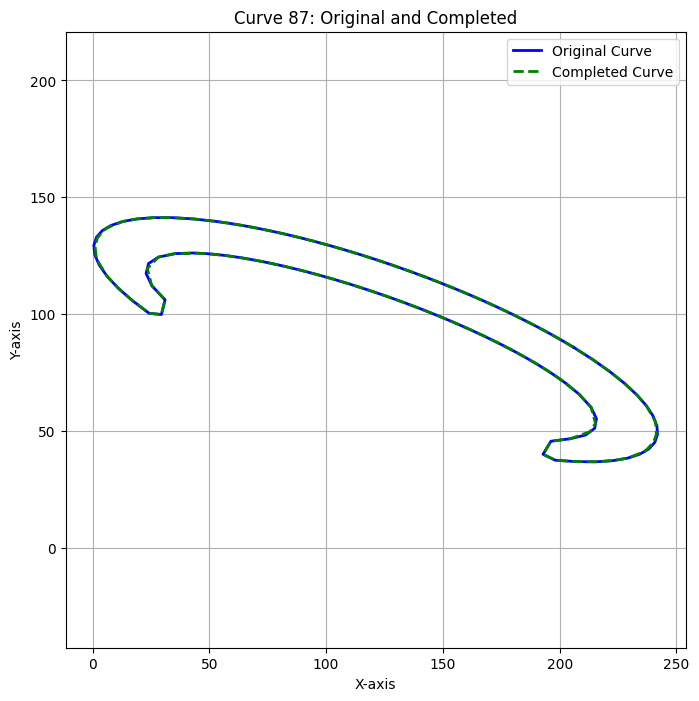

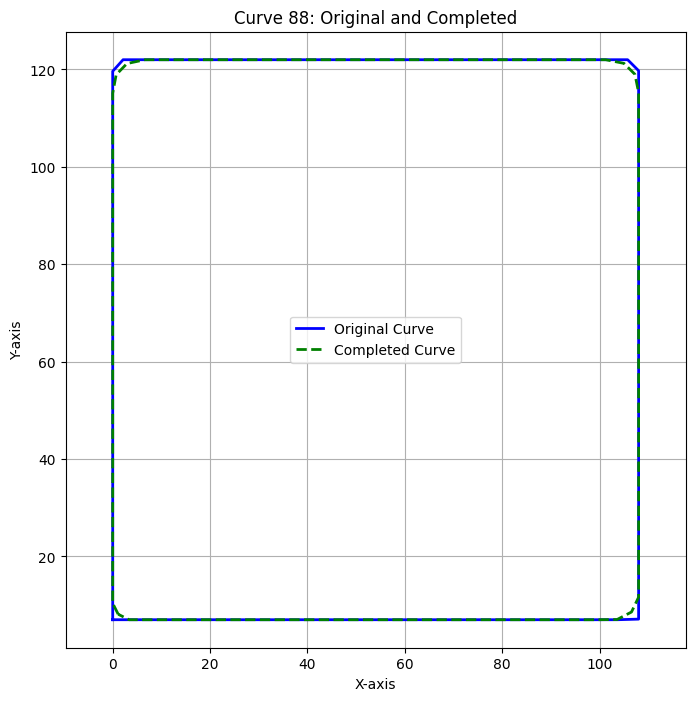

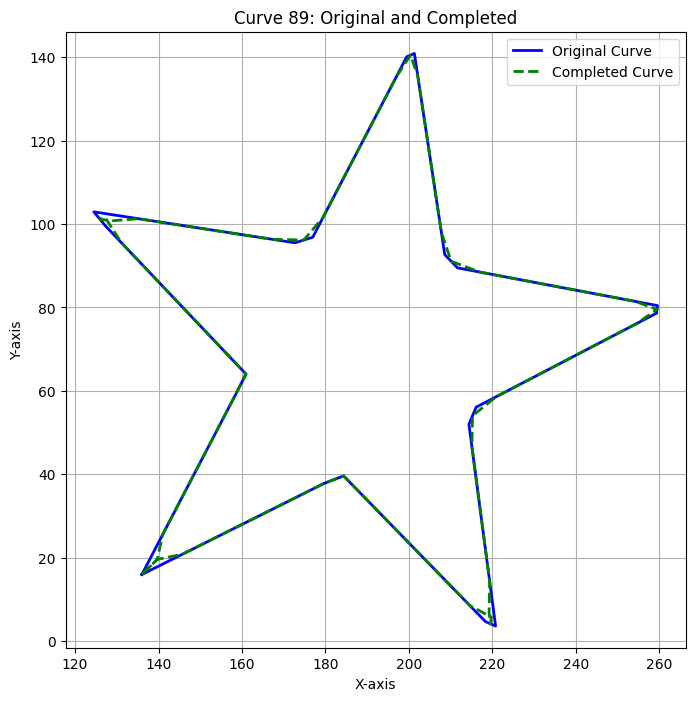

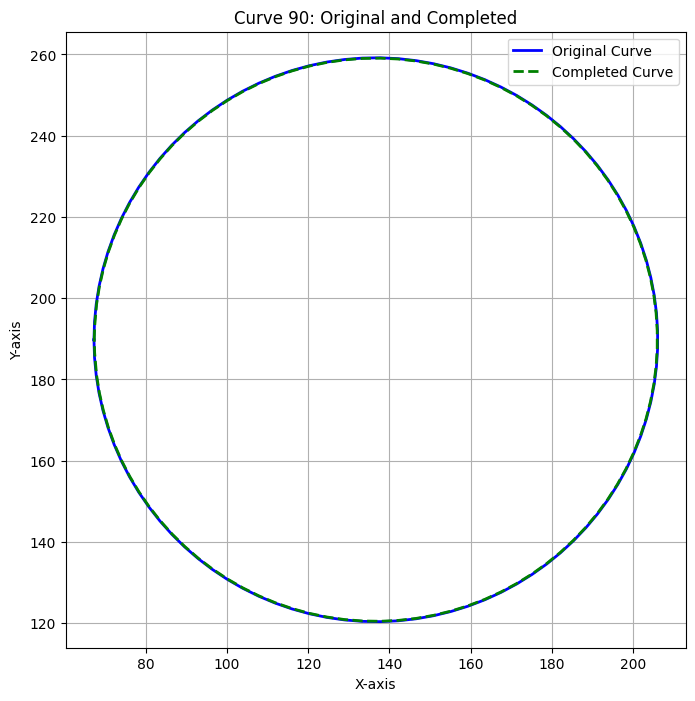

In [ ]:
import matplotlib.pyplot as plt

def plot_full_curve(original_curve, completed_curve, curve_index):
    plt.figure(figsize=(8, 8))

    # Plot the original curve
    plt.plot(original_curve[:, 0], original_curve[:, 1], color='blue', linestyle='-', linewidth=2, label='Original Curve')

    # Plot the completed curve
    plt.plot(completed_curve[:, 0], completed_curve[:, 1], color='green', linestyle='--', linewidth=2, label='Completed Curve')

    plt.title(f'Curve {curve_index}: Original and Completed')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()

# Assuming all_regularized_curves contains the original curves
for i, (original_curve, completed_curve) in enumerate(zip(all_regularized_curves, completed_curves)):
    plot_full_curve(original_curve, completed_curve, i)

#Evaluation

In [ ]:
!pip install svgwrite

In [ ]:
!pip install cairosvg

In [166]:
import svgwrite
import cairosvg
import numpy as np

def polylines2svg(paths_XYs, svg_path):
    W, H = 0, 0

    # Check if paths_XYs is empty
    if not paths_XYs:
        raise ValueError("No paths provided to draw.")

    # Calculate the width and height of the drawing
    for path_XYs in paths_XYs:
        if not path_XYs:  # Check if the current path is empty
            print("Warning: Encountered an empty path.")
            continue

        for XY in path_XYs:
            if isinstance(XY, (list, np.ndarray)):  # Check if XY is a list or NumPy array
                if XY.size > 0:  # Ensure XY is not empty
                    W = max(W, np.max(XY[:, 0]))
                    H = max(H, np.max(XY[:, 1]))
                else:
                    print("Warning: Encountered an empty XY array.")
            else:
                print("Warning: Encountered an invalid XY structure.")

    # Add padding
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)

    # Ensure dimensions are valid
    if W <= 0 or H <= 0:
        raise ValueError("Invalid dimensions for SVG: Width and Height must be greater than zero.")

    # Print dimensions for debugging
    print(f"SVG dimensions: Width = {W}, Height = {H}")

    # Create a new SVG drawing
    dwg = svgwrite.Drawing(svg_path, profile='tiny', size=(W, H))
    group = dwg.g()

    colours = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']  # Example color list

    # Draw each polyline
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]  # Cycle through colors

        for XY in path:
            if XY.size > 0:  # Ensure XY is not empty
                path_data.append(f"M {XY[0, 0]} {XY[0, 1]}")  # Move to the first point
                for j in range(1, len(XY)):
                    path_data.append(f"L {XY[j, 0]} {XY[j, 1]}")  # Line to the next point

                if not np.allclose(XY[0], XY[-1]):  # Check if path is closed
                    path_data.append("Z")  # Close the path

                # Join the path data into a single string
                path_string = " ".join(path_data)

                # Add the path to the SVG
                group.add(dwg.path(d=path_string, fill=c, stroke='none', stroke_width=2))
            else:
                print("Warning: Encountered an empty XY array in path.")

    dwg.add(group)
    dwg.save()

    # Convert the SVG to PNG
    png_path = svg_path.replace('.svg', '.png')

    # Adjust the output size factor to prevent excessive sizes
    max_output_size = 2048  # Set a maximum output size

    # Calculate aspect ratio and adjust output dimensions while preserving the aspect ratio
    aspect_ratio = W / H if H > 0 else 1
    output_width = min(max_output_size, W)
    output_height = int(output_width / aspect_ratio) if aspect_ratio > 0 else H

    if output_height > max_output_size:
        output_height = max_output_size
        output_width = int(output_height * aspect_ratio)

    print(f"Output PNG dimensions: Width = {output_width}, Height = {output_height}")

    cairosvg.svg2png(url=svg_path, write_to=png_path,
                     parent_width=W, parent_height=H,
                     output_width=output_width, output_height=output_height,
                     background_color='white')


In [167]:
import os
import svgwrite
import cairosvg
import numpy as np
from svgpathtools import svg2paths

In [170]:
def process_files_and_generate_svgs(curvetopia_path):
    # Load all CSV files
    csv_files = [f for f in os.listdir(curvetopia_path) if f.endswith('.csv')]
    all_shapes = []

    for csv_file in csv_files:
        full_path = os.path.join(curvetopia_path, csv_file)
        paths_XYs = read_csv(full_path)
        all_shapes.extend(paths_XYs)  # Combine all shapes from different files

    # Load all SVG files
    svg_files = [f for f in os.listdir(curvetopia_path) if f.endswith('.svg')]
    all_svg_shapes = []

    for svg_file in svg_files:
        full_path = os.path.join(curvetopia_path, svg_file)
        paths, attributes = svg2paths(full_path)
        all_svg_shapes.extend(paths)  # Store the paths from the SVG files

    # Combine all paths_XYs and SVG paths into a single list
    all_paths = all_shapes + all_svg_shapes

    # Generate SVGs and PNGs
    for i, paths in enumerate(all_paths):
        svg_output_path = os.path.join(curvetopia_path, f'output_{i}.svg')
        try:
            polylines2svg([paths], svg_output_path)
            print(f"Generated {svg_output_path} and corresponding PNG.")
        except ValueError as e:
            print(f"Skipping generation for output_{i}.svg due to error: {e}")


In [171]:
process_files_and_generate_svgs("/content/drive/MyDrive/Curvetopia")

Streaming output truncated to the last 5000 lines.
Skipping generation for output_206.svg due to error: Invalid dimensions for SVG: Width and Height must be greater than zero.
Skipping generation for output_207.svg due to error: Invalid dimensions for SVG: Width and Height must be greater than zero.
Skipping generation for output_208.svg due to error: Invalid dimensions for SVG: Width and Height must be greater than zero.
Skipping generation for output_209.svg due to error: Invalid dimensions for SVG: Width and Height must be greater than zero.
Skipping generation for output_210.svg due to error: Invalid dimensions for SVG: Width and Height must be greater than zero.
Skipping generation for output_211.svg due to error: Invalid dimensions for SVG: Width and Height must be greater than zero.
Skipping generation for output_212.svg due to error: Invalid dimensions for SVG: Width and Height must be greater than zero.
Skipping generation for output_213.svg due to error: Invalid dimensions fo